# Training Evaluation
After training the base model and evaluating all training samples, this notebook will analyze examples of proteins that were learned successfully and those that proved challenging to learn.
 
Upon examining the proteins that were not learned well, we observed that these protein chains lack complex structural features and do not follow typical hydrophobic and hydrophilic patterns.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
#retina display
%config InlineBackend.figure_format = 'retina'
import os
import torch
from tqdm import tqdm

In the first part of the notebook:

1. Take all results from a trained model evaluation into pandas df
2. Get for each protein its sequence length.
3. normelize protein energy regarding his length.
4. plot EDA on the data.


In the second part of the notebook:

1. get all validation results of a trained model 
2.  get all trained result of a fine tuned model
2.  plot EDA on the data

# Base training results

In [2]:
train_df = pd.read_csv('../res/trianed_models-cycle2_5/evaluation_results_dataset_training.csv')
val_df = pd.read_csv('../res/trianed_models-cycle2_5/evaluation_results_dataset_validation.csv')
display(train_df)
display(val_df)

,protein_id,Ejf,Eju,Exd,Ecd,Exdu,Ecy1,Ecy2,Ecy3,Ecy4,loss,lossd,lossg,lossc
0,3BM7_1_A,-41.412666,1.210083,6.554447,7.656404,0.088258,14.363352,8.834108,10.318999,5.888835,-18.966599,-43.895153,0.0,24.928555
1,2D6Y_d2d6ya1,-27.726269,-0.641665,5.556715,1.156423,-3.466122,7.996444,-5.226167,4.264071,4.640426,-16.210659,-26.703526,0.0,10.492866
2,3NIV_d3nivd1,-19.248713,2.152787,8.201568,8.957499,0.354854,0.373409,0.296913,9.085759,13.828856,-14.202070,-23.055311,0.0,8.853241
3,4UHP_d4uhpf1,-41.496311,-1.155744,10.389309,8.171604,-0.422398,5.632416,1.798253,5.289814,2.973650,-19.724230,-41.612602,0.0,21.888372
4,4ZDE_d4zdea-,-45.286003,0.111268,5.686179,13.705809,-1.255858,6.829746,6.630347,6.991740,4.982130,-19.864986,-46.941727,0.0,27.076740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100082,1BLN_d1blnc1,-41.159500,-0.491732,4.499800,4.773074,-0.686907,8.061317,4.236060,7.218131,4.112117,-19.726107,-40.723759,0.0,20.997652
100083,4UAX_1_A,-43.087700,-2.108433,4.965361,12.650717,0.758371,4.574492,12.040394,2.016724,3.304693,-19.481003,-44.227127,0.0,24.746124
100084,2O3B_1_A,-44.892448,-1.774206,6.390525,6.740859,-3.082276,3.734115,3.016077,3.334157,1.562865,-19.322405,-43.220825,0.0,23.898420
100085,1RLK_1_A,-42.736618,0.603697,4.420863,9.073440,0.066312,1.717459,-0.352922,4.464277,7.954953,-19.550213,-41.938480,0.0,22.388268


,protein_id,Ejf,Eju,Exd,Ecd,Exdu,Ecy1,Ecy2,Ecy3,Ecy4,loss,lossd,lossg,lossc
0,10#3LM3_1_A,-43.077850,0.514594,5.265057,16.074951,-0.241122,5.820592,5.355580,4.687627,4.801064,-19.956041,-44.953094,0.0,24.997053
1,10#1WAZ_1_A,0.710642,-3.970699,3.041002,5.391320,-3.116357,0.003460,3.384948,-7.710649,-2.953555,1.402583,-0.196669,0.0,1.599252
2,50#3ZJC_1_A,-53.950993,-1.444986,3.961429,17.133526,-0.274972,2.872454,9.190847,-0.713877,-2.839231,-16.122593,-53.049454,0.0,36.926861
3,50#3RCP_1_A,-39.151497,0.016677,5.392282,18.622913,1.177743,10.277054,-1.661547,6.806374,7.225792,-18.895681,-42.418282,0.0,23.522600
4,20#3S0X_1_A,-26.677555,-0.465602,5.203781,5.174927,0.785276,-3.101509,-4.663766,7.404089,7.992790,-16.058128,-26.241016,0.0,10.182888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,20#1JEG_2_B,-1.619410,-2.205095,6.828994,5.035374,5.158291,-0.473881,6.895872,2.910040,9.107167,-3.109135,-5.834352,0.0,2.725217
156,10#1HF2_1_A,-40.554646,-3.834455,2.237683,1.284628,-0.282752,6.475180,7.369308,3.840530,-0.427742,-18.495705,-38.243340,0.0,19.747635
157,20#4ZBH_1_A,-40.629997,1.969584,13.347588,10.655331,2.439743,9.007809,9.570798,8.633584,2.610902,-19.095652,-43.611416,0.0,24.515764
158,40#3BJE_1_A,-46.396908,0.592156,7.974743,15.670531,-0.588736,3.220481,9.228892,3.730506,3.055240,-19.234745,-47.916161,0.0,28.681416


In [3]:
# concat thos two dataframes and add a column to indicate the dataset
train_df['dataset'] = 'train'
val_df['dataset'] = 'val'
df = pd.concat([train_df, val_df])
display(df)

,protein_id,Ejf,Eju,Exd,Ecd,Exdu,Ecy1,Ecy2,Ecy3,Ecy4,loss,lossd,lossg,lossc,dataset
0,3BM7_1_A,-41.412666,1.210083,6.554447,7.656404,0.088258,14.363352,8.834108,10.318999,5.888835,-18.966599,-43.895153,0.0,24.928555,train
1,2D6Y_d2d6ya1,-27.726269,-0.641665,5.556715,1.156423,-3.466122,7.996444,-5.226167,4.264071,4.640426,-16.210659,-26.703526,0.0,10.492866,train
2,3NIV_d3nivd1,-19.248713,2.152787,8.201568,8.957499,0.354854,0.373409,0.296913,9.085759,13.828856,-14.202070,-23.055311,0.0,8.853241,train
3,4UHP_d4uhpf1,-41.496311,-1.155744,10.389309,8.171604,-0.422398,5.632416,1.798253,5.289814,2.973650,-19.724230,-41.612602,0.0,21.888372,train
4,4ZDE_d4zdea-,-45.286003,0.111268,5.686179,13.705809,-1.255858,6.829746,6.630347,6.991740,4.982130,-19.864986,-46.941727,0.0,27.076740,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,20#1JEG_2_B,-1.619410,-2.205095,6.828994,5.035374,5.158291,-0.473881,6.895872,2.910040,9.107167,-3.109135,-5.834352,0.0,2.725217,val
156,10#1HF2_1_A,-40.554646,-3.834455,2.237683,1.284628,-0.282752,6.475180,7.369308,3.840530,-0.427742,-18.495705,-38.243340,0.0,19.747635,val
157,20#4ZBH_1_A,-40.629997,1.969584,13.347588,10.655331,2.439743,9.007809,9.570798,8.633584,2.610902,-19.095652,-43.611416,0.0,24.515764,val
158,40#3BJE_1_A,-46.396908,0.592156,7.974743,15.670531,-0.588736,3.220481,9.228892,3.730506,3.055240,-19.234745,-47.916161,0.0,28.681416,val


### protein sequence len
For each protein we need to add its len and normelize the energy

In [4]:
path = '../data/casp12_data_100/test/'
test_files = os.listdir(path)
#load from each folder seq.pt file and get the length of the sequence
lengths = []
for file in test_files:
    seq = torch.load(path+file+'/mask.pt',weights_only=False)
    lengths.append(len(seq))
# Add to a dataframe
test_df = pd.DataFrame({'protein_id':test_files,'length': lengths})
test_df['dataset'] = 'test'
display(test_df)

,protein_id,length,dataset
0,TBM#T0865,75,test
1,TBM#T0872,91,test
2,TBM#T0922,96,test
3,FM#T0900,106,test
4,FM#T0869,120,test
5,TBM#T0891,130,test
6,FM#T0859,133,test
7,TBM#T0860,137,test
8,FM#T0870,138,test
9,TBM#T0921,149,test


In [5]:
# Only run once, after creating the dataset load from file
"""train_ds_path = '../data/casp12_data_100/train/'
val_ds_path = ['../data/casp12_data_100/valid-10/', '../data/casp12_data_100/valid-20/',
               '../data/casp12_data_100/valid-30/', '../data/casp12_data_100/valid-40/',
               '../data/casp12_data_100/valid-50/', '../data/casp12_data_100/valid-70/',
                '../data/casp12_data_100/valid-90/']
# Get dataset of protein lengths
print("Adding sequence lengths for train dataset")
train_files = os.listdir(train_ds_path)
lengths = []
for file in tqdm(train_files):
    seq = torch.load(train_ds_path+file+'/mask.pt',weights_only=False)
    lengths.append(len(seq))
# Add to a dataframe
train_seq_df = pd.DataFrame({'protein_id':train_files,'length': lengths})

print("Adding sequence lengths for validation dataset")
val_files = []
val_paths = []
for path in val_ds_path:
    val_files += os.listdir(path)
    # concat path to val_files
    val_paths += [path+file for file in os.listdir(path)]
lengths = []
for file in tqdm(val_paths):
    seq = torch.load(file+'/mask.pt',weights_only=False)
    lengths.append(len(seq))
# Add to a dataframe
val_seq_df = pd.DataFrame({'protein_id':val_files,'length': lengths})

# Merge the dataframes
train_seq_df['dataset'] = 'train'
val_seq_df['dataset'] = 'val'
seq_df = pd.concat([train_seq_df, val_seq_df])
display(seq_df)
# Join the dataframes with the main dataframe
df = pd.merge(df,seq_df, on=['protein_id','dataset'], how='left')

print("not availabel lengths:")
display(df[df['length'].isna()])
# Save the dataframe
df_path = './eval_res/'
if not os.path.exists(df_path):
    os.makedirs(df_path)
df.to_csv(df_path+'evaluation_results.csv',index=False)

"""
df = pd.read_csv('./eval_res/evaluation_results.csv')

In [6]:
df.head()

,protein_id,Ejf,Eju,Exd,Ecd,Exdu,Ecy1,Ecy2,Ecy3,Ecy4,loss,lossd,lossg,lossc,dataset,length
0,3BM7_1_A,-41.412666,1.210083,6.554447,7.656404,0.088258,14.363352,8.834108,10.318999,5.888835,-18.966599,-43.895153,0.0,24.928555,train,115
1,2D6Y_d2d6ya1,-27.726269,-0.641665,5.556715,1.156423,-3.466122,7.996444,-5.226167,4.264071,4.640426,-16.210659,-26.703526,0.0,10.492866,train,68
2,3NIV_d3nivd1,-19.248713,2.152787,8.201568,8.957499,0.354854,0.373409,0.296913,9.085759,13.828856,-14.202070,-23.055311,0.0,8.853241,train,80
3,4UHP_d4uhpf1,-41.496311,-1.155744,10.389309,8.171604,-0.422398,5.632416,1.798253,5.289814,2.973650,-19.724230,-41.612602,0.0,21.888372,train,88
4,4ZDE_d4zdea-,-45.286003,0.111268,5.686179,13.705809,-1.255858,6.829746,6.630347,6.991740,4.982130,-19.864986,-46.941727,0.0,27.076740,train,269


# Normelize protein energy and loss regarding sequence lenght

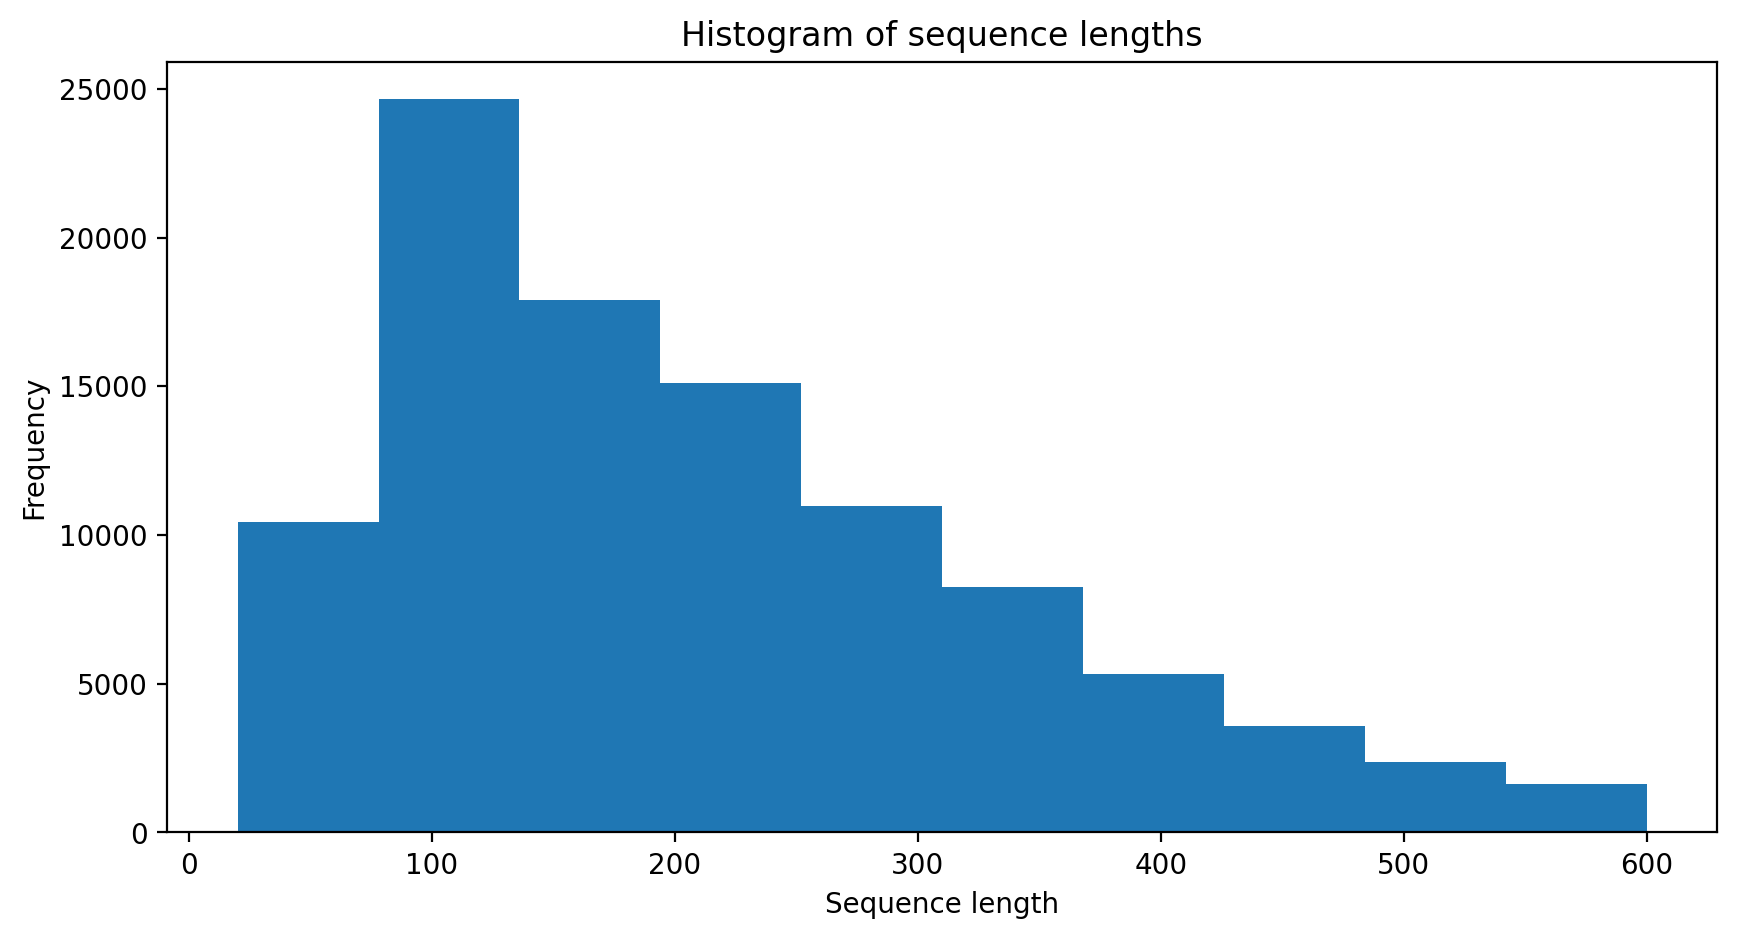

In [7]:
# display histogram of sequence lengths
plt.figure(figsize=(10,5))
plt.hist(df['length'], bins=10)
plt.title('Histogram of sequence lengths')
plt.xlabel('Sequence length')
plt.ylabel('Frequency')
plt.show()

<Figure size 1000x500 with 0 Axes>

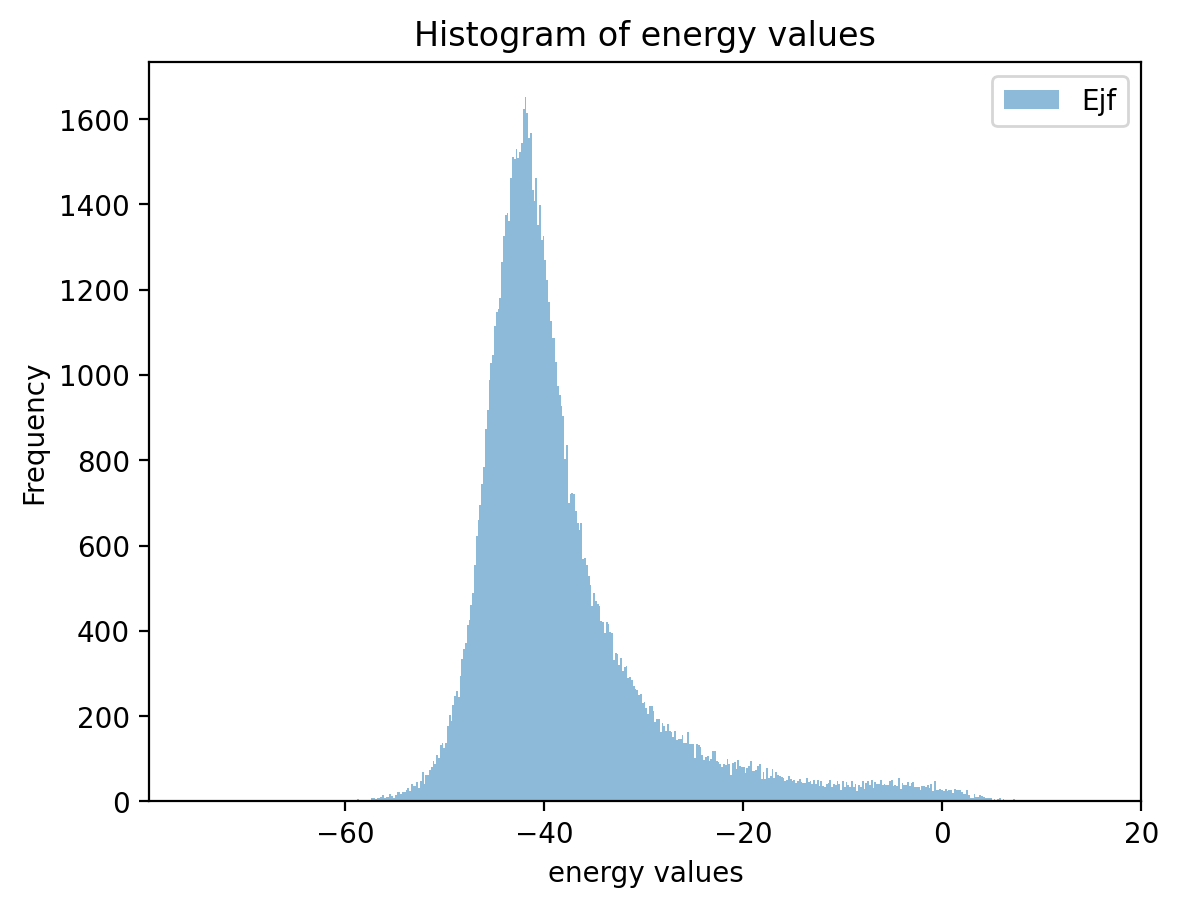

In [8]:
# Display histogram of Ejf	Eju	Exd	Ecd	Exdu	Ecy1	Ecy2	Ecy3	Ecy4 values in the same plot
plt.figure(figsize=(10,5))
df[['Ejf']].plot.hist(bins=500, alpha=0.5)
plt.title('Histogram of energy values')
plt.xlabel('energy values')
plt.ylabel('Frequency')
plt.show()

<Figure size 1000x500 with 0 Axes>

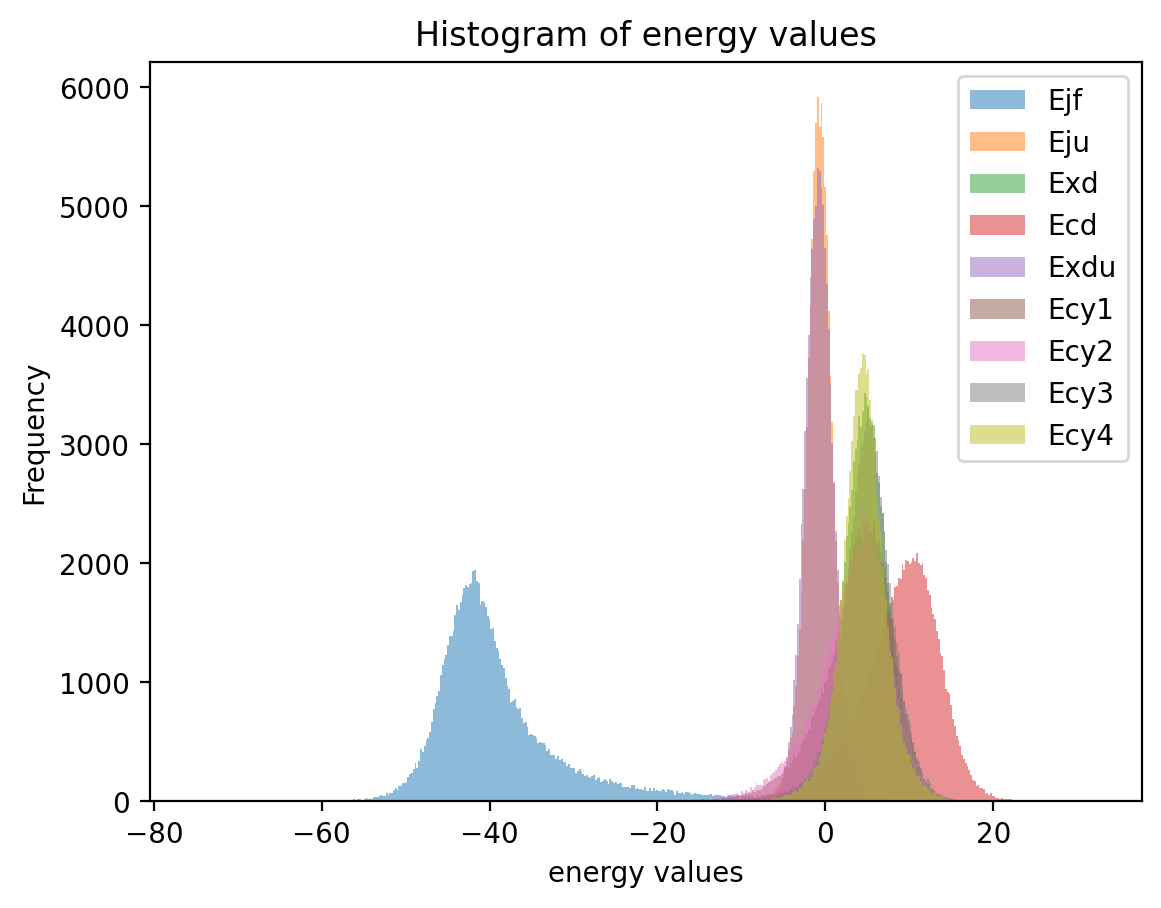

In [9]:
# Display histogram of Ejf	Eju	Exd	Ecd	Exdu	Ecy1	Ecy2	Ecy3	Ecy4 values in the same plot
plt.figure(figsize=(10,5))
df[['Ejf','Eju','Exd','Ecd','Exdu','Ecy1','Ecy2','Ecy3','Ecy4']].plot.hist(bins=500, alpha=0.5)
plt.title('Histogram of energy values')
plt.xlabel('energy values')
plt.ylabel('Frequency')
plt.show()

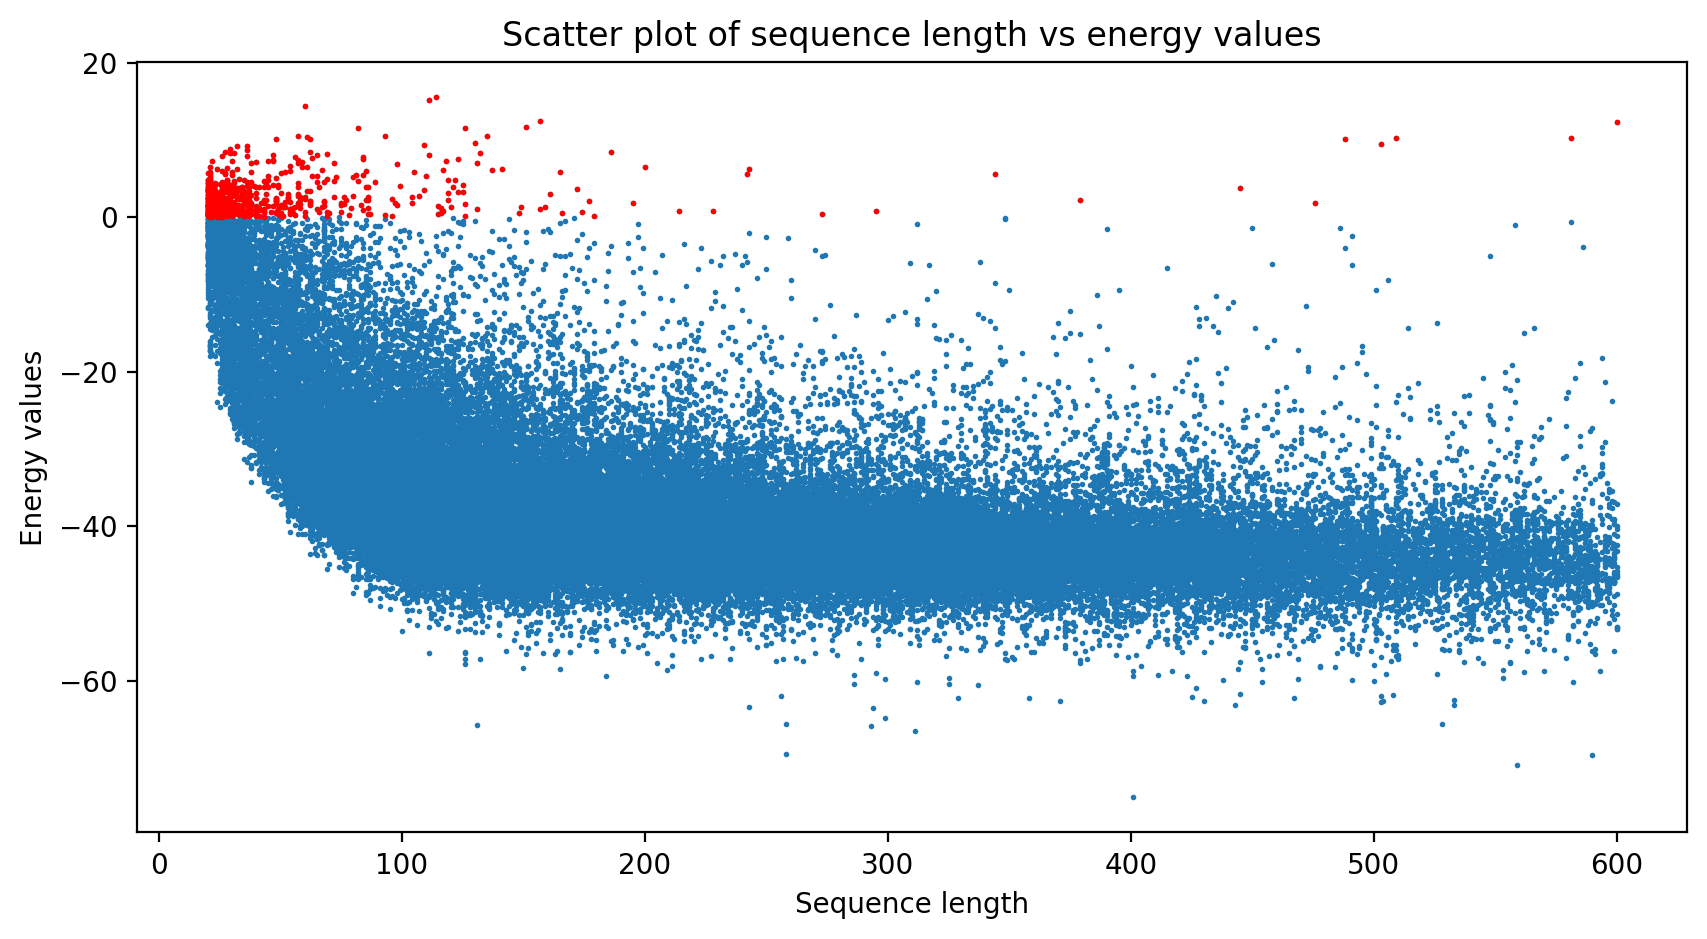

In [10]:
# Display histogram of Ejf	Eju	Exd	Ecd	Exdu	Ecy1	Ecy2	Ecy3	Ecy4 values in the same plot
plt.figure(figsize=(10,5))
plt.scatter(df['length'],df['Ejf'], s=1)
plt.scatter(df['length'][df['Ejf']>0],df['Ejf'][df['Ejf']>0], s=1, c='r')
plt.title('Scatter plot of sequence length vs energy values')
plt.xlabel('Sequence length')
plt.ylabel('Energy values')
plt.show()

<Figure size 1000x500 with 0 Axes>

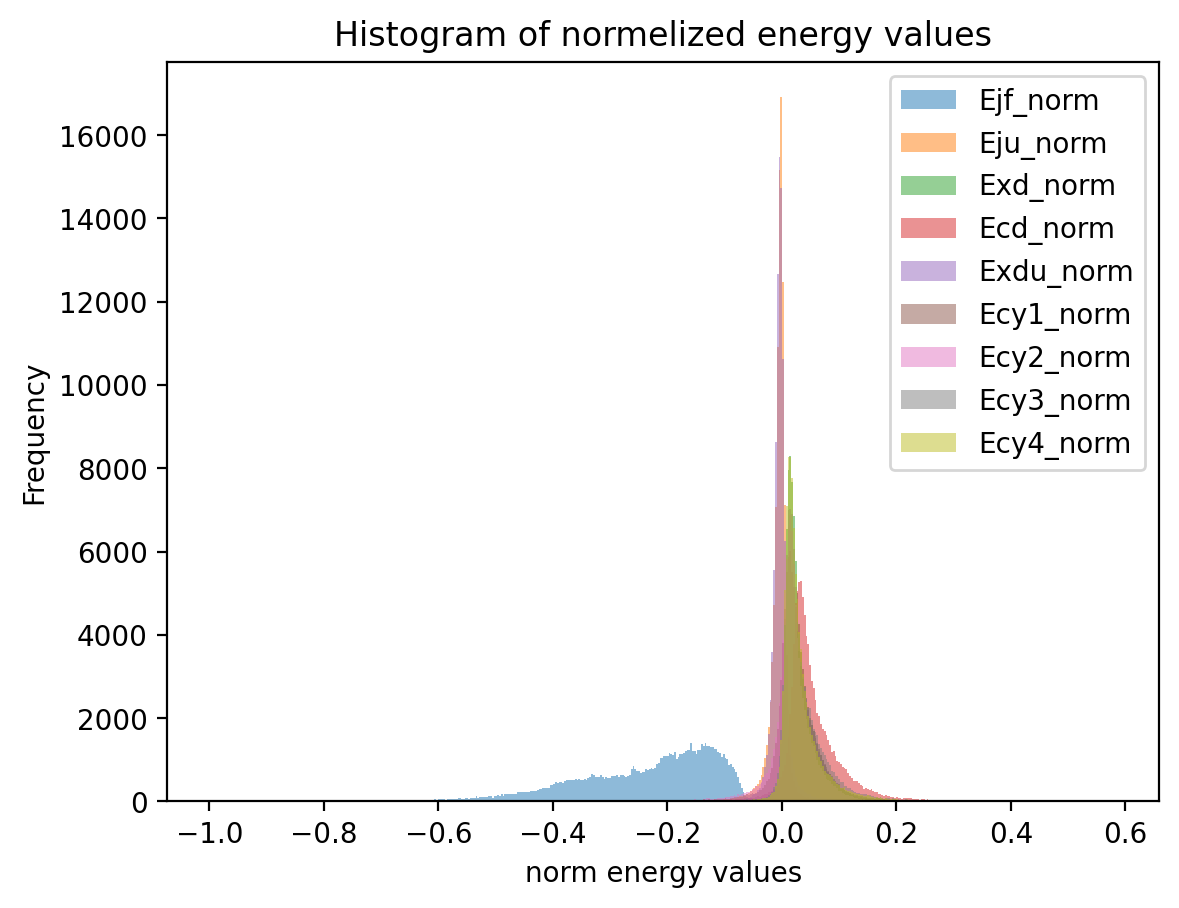

In [11]:
# normalize the energy values using the length of the sequence
df[['Ejf_norm','Eju_norm','Exd_norm','Ecd_norm','Exdu_norm','Ecy1_norm','Ecy2_norm','Ecy3_norm','Ecy4_norm']] = df[['Ejf','Eju','Exd','Ecd','Exdu','Ecy1','Ecy2','Ecy3','Ecy4']].div(df['length'], axis=0)
df['loss_norm'] = df['loss'].div(df['length'], axis=0)
df['lossd_norm'] = df['lossd'].div(df['length'], axis=0)
# Display histogram of Ejf	Eju	Exd	Ecd	Exdu	Ecy1	Ecy2	Ecy3	Ecy4 values in the same plot
plt.figure(figsize=(10,5))
df[['Ejf_norm','Eju_norm','Exd_norm','Ecd_norm','Exdu_norm','Ecy1_norm','Ecy2_norm','Ecy3_norm','Ecy4_norm']].plot.hist(bins=500, alpha=0.5)
plt.title('Histogram of normelized energy values')
plt.xlabel('norm energy values')
plt.ylabel('Frequency')
plt.show()

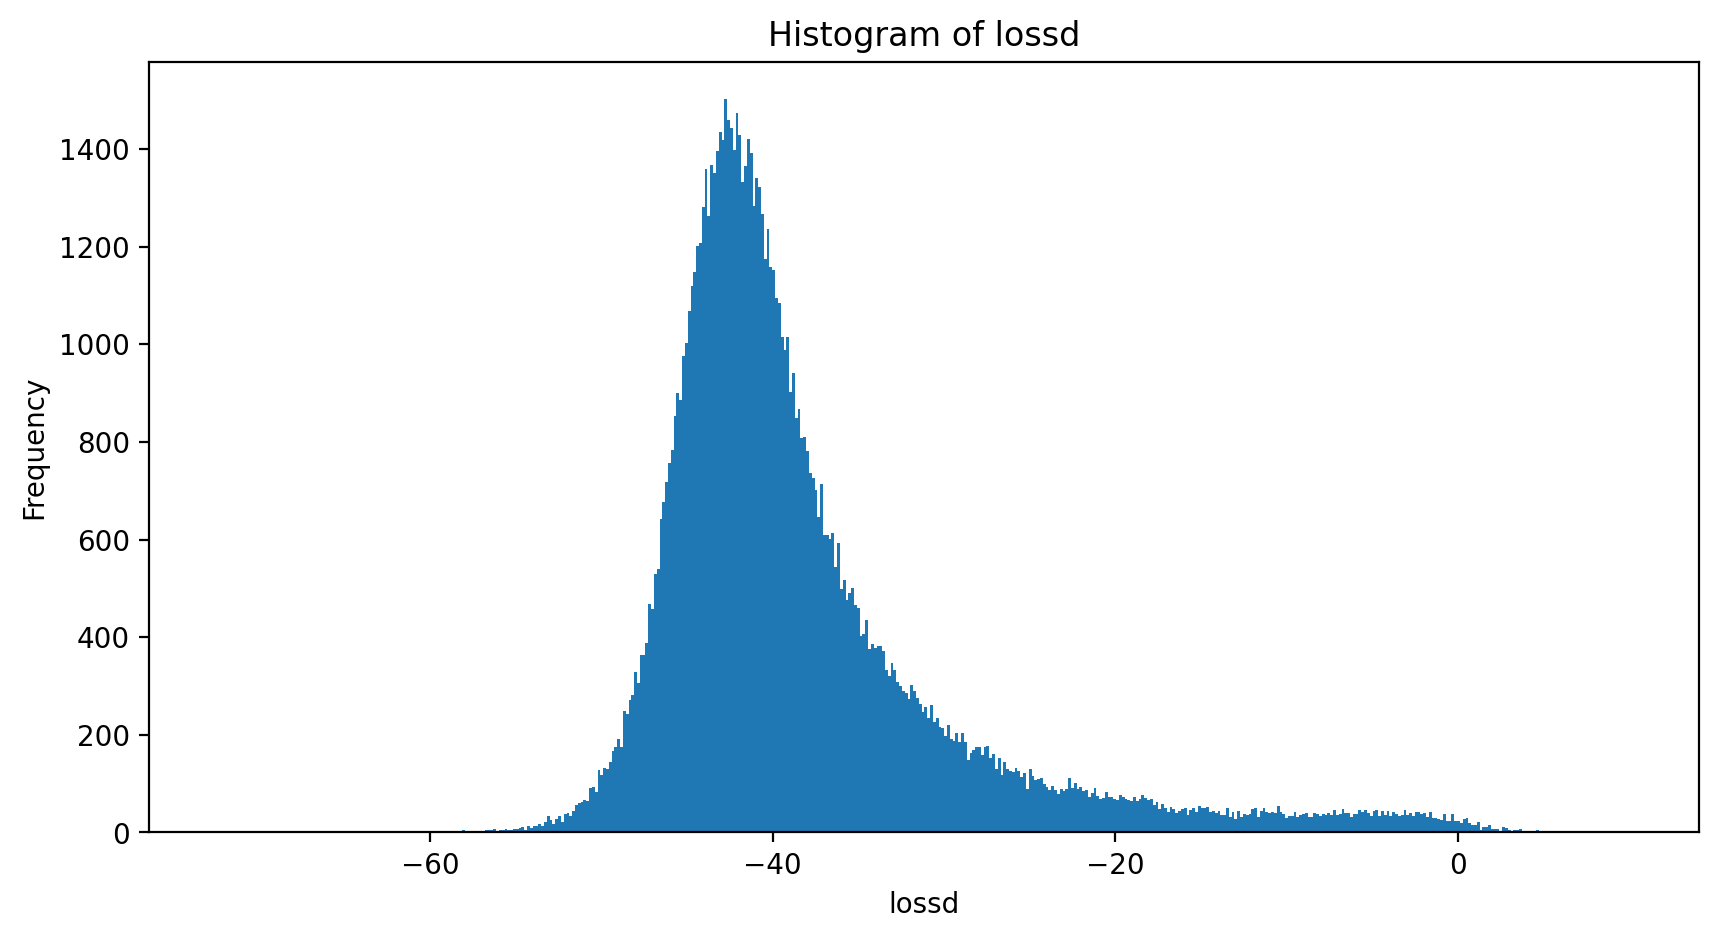

In [12]:
# plot lossd histogram
plt.figure(figsize=(10,5))
plt.hist(df['lossd'], bins=500)
plt.title('Histogram of lossd')
plt.xlabel('lossd')
plt.ylabel('Frequency')
plt.show()

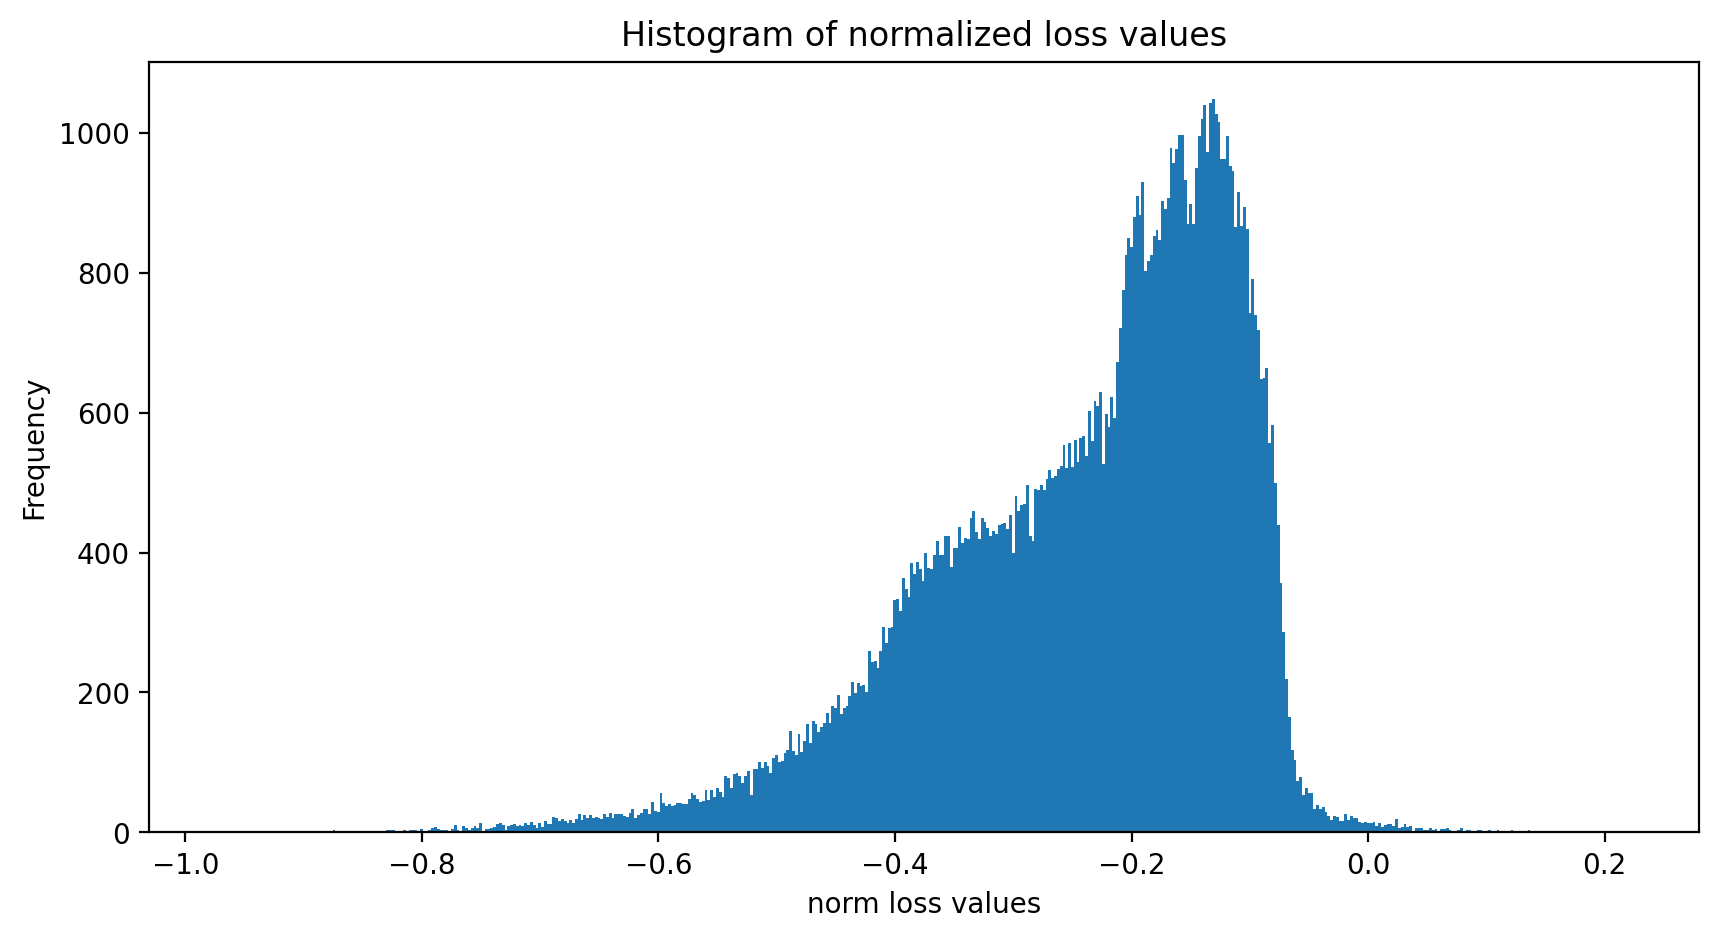

In [13]:
plt.figure(figsize=(10,5))
df['lossd_norm'].plot.hist(bins=500)
plt.title('Histogram of normalized loss values')
plt.xlabel('norm loss values')
plt.ylabel('Frequency')
plt.show()

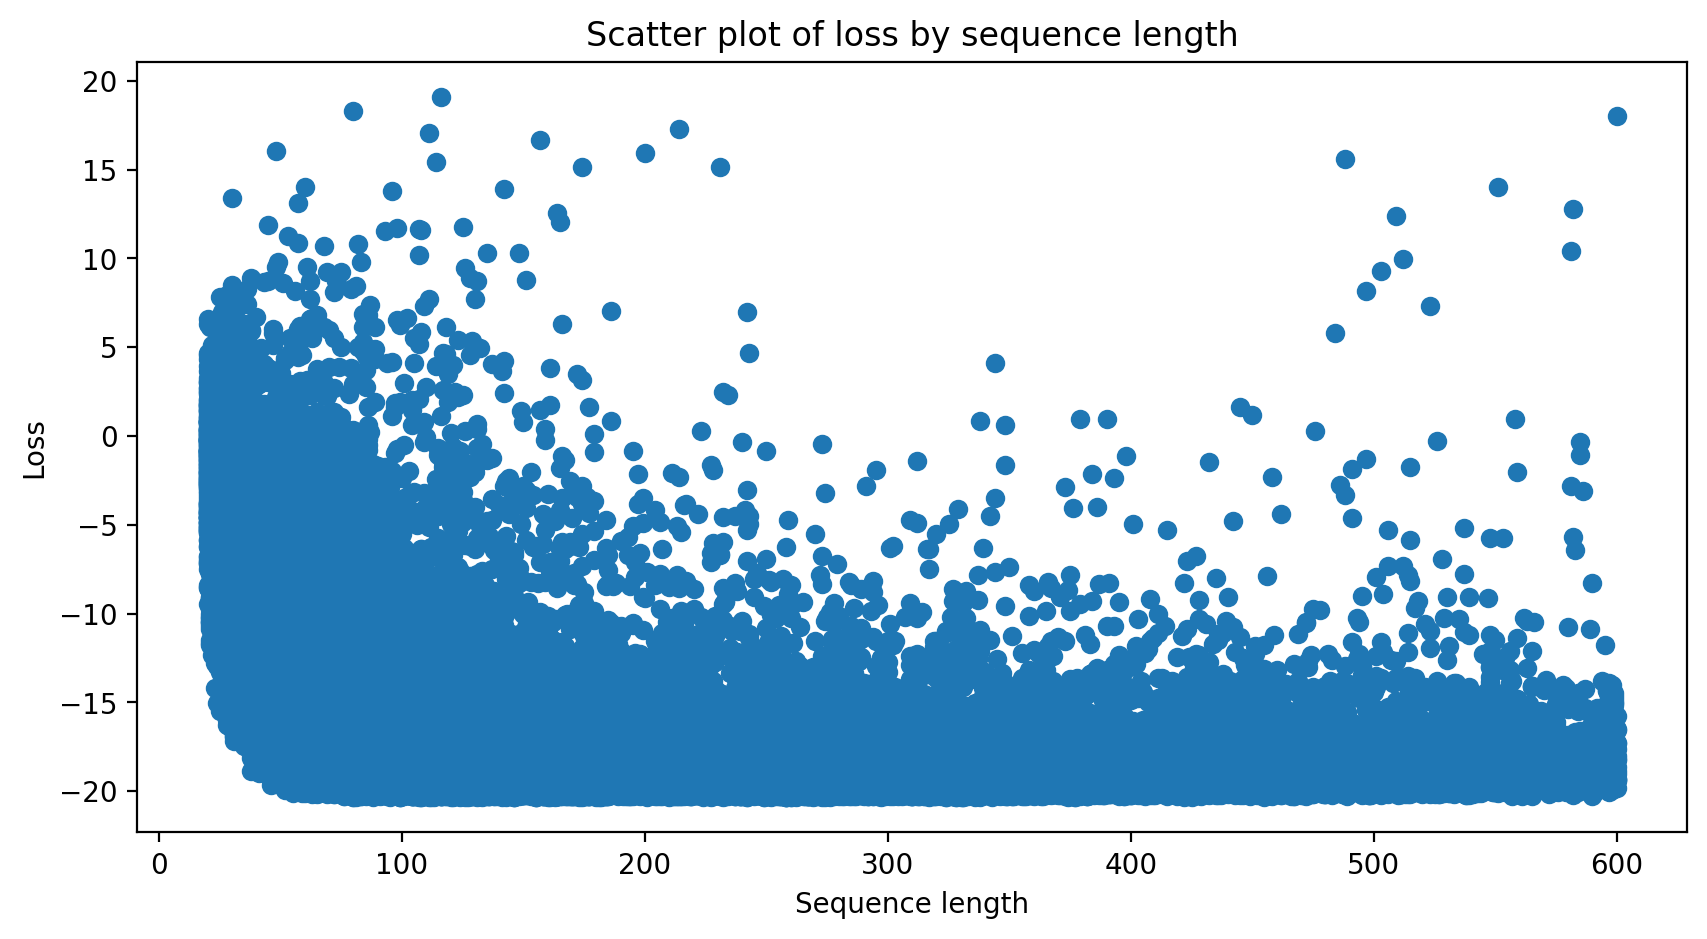

In [14]:
# Plot loss by sequence length
plt.figure(figsize=(10,5))
plt.scatter(df['length'], df['loss'])
plt.title('Scatter plot of loss by sequence length')
plt.xlabel('Sequence length')
plt.ylabel('Loss')
plt.show()

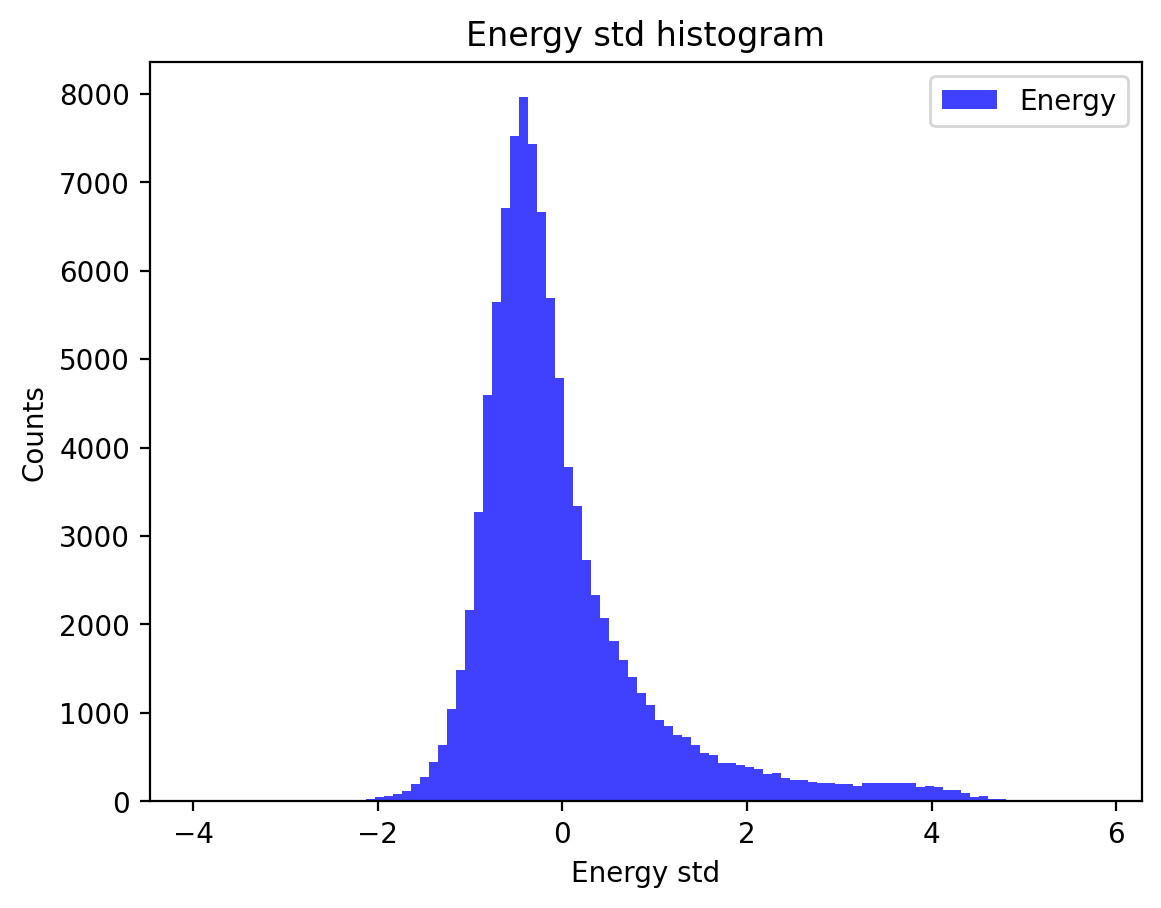

In [15]:
# Get energy std histogram
std = df['Ejf'].std()   
mean  = df['Ejf'].mean()
normelize_energy = (df['Ejf'] - mean) / std
plt.hist(normelize_energy, bins=100, alpha=0.75, color='b', label='Energy')
plt.xlabel('Energy std')
plt.ylabel('Counts')
plt.title('Energy std histogram')
plt.legend()
plt.show()

# Remove outliner proteins
Given that in a normal distribution, only 0.01% of samples should be 3 standard deviations or more from the mean, we will identify and save these proteins, and subsequently exclude them from training.

In [16]:
# Get outliners proteins using the energy std
threshold = 3
outliners = df[normelize_energy>2]
outliners

,protein_id,Ejf,Eju,Exd,Ecd,Exdu,Ecy1,Ecy2,Ecy3,Ecy4,...,Eju_norm,Exd_norm,Ecd_norm,Exdu_norm,Ecy1_norm,Ecy2_norm,Ecy3_norm,Ecy4_norm,loss_norm,lossd_norm
2,3NIV_d3nivd1,-19.248713,2.152787,8.201568,8.957499,0.354854,0.373409,0.296913,9.085759,13.828856,...,0.026910,0.102520,0.111969,0.004436,0.004668,0.003711,0.113572,0.172861,-0.177526,-0.288191
26,1NVP_d1nvpb-,-17.541073,-0.358626,9.834077,5.123202,1.898779,-20.309210,11.120640,9.081901,0.855915,...,-0.008340,0.228699,0.119144,0.044158,-0.472307,0.258620,0.211207,0.019905,-0.145211,-0.417492
39,1QA4_1_A,-9.399616,-2.187702,-1.538781,5.825319,-7.264373,-3.353702,-9.374302,0.504596,-3.098836,...,-0.038381,-0.026996,0.102199,-0.127445,-0.058837,-0.164461,0.008853,-0.054366,-0.076103,-0.132866
71,1KDX_2_B,-13.125846,-0.037650,4.443370,4.805130,2.085743,-9.659931,3.933078,3.394302,3.659888,...,-0.001345,0.158692,0.171612,0.074491,-0.344998,0.140467,0.121225,0.130710,-0.338700,-0.478848
79,1I4O_2_C,6.285614,6.178723,5.701779,6.206796,3.505634,6.610840,7.463903,6.360628,5.527806,...,0.043821,0.040438,0.044020,0.024863,0.046885,0.052935,0.045111,0.039204,0.026048,-0.000070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100231,10#4DT7_3_E,0.629320,-0.415127,0.740795,1.996295,0.946104,-0.164583,0.225001,1.655395,1.864883,...,-0.020756,0.037040,0.099815,0.047305,-0.008229,0.011250,0.082770,0.093244,-0.017601,-0.024430
100233,50#4OO6_2_B,4.384378,3.656649,1.174381,-2.250956,1.461947,3.877486,1.487733,2.672768,3.305389,...,0.135431,0.043496,-0.083369,0.054146,0.143611,0.055101,0.098991,0.122422,0.136455,0.104976
100240,20#2MLV_1_A,-4.478374,-3.073463,-0.937033,0.132302,-1.255765,11.230172,5.033097,9.560785,3.463300,...,-0.102449,-0.031234,0.004410,-0.041859,0.374339,0.167770,0.318693,0.115443,-0.143616,-0.249848
100242,20#1JEG_2_B,-1.619410,-2.205095,6.828994,5.035374,5.158291,-0.473881,6.895872,2.910040,9.107167,...,-0.088204,0.273160,0.201415,0.206332,-0.018955,0.275835,0.116402,0.364287,-0.124365,-0.233374


In [17]:
# Save the outliners
outliners[['protein_id','Ejf','Eju','Exd','Ecd','Exdu','Ecy1','Ecy2','Ecy3','Ecy4','length','dataset']].to_csv(f'./eval_res/ejf_{threshold}_outliners.csv',index=False)

# Validation evaluation

In [18]:
df_fine_tune = pd.read_csv('../Megascale-fineTuning/evaluation/trianed_models-2cycle_drop_eval.csv')
df_metric = pd.read_csv('../Megascale-fineTuning/evaluation/trianed_models-2cycle_drop_protein_metrics.csv')
display(df_fine_tune)
display(df_metric)

,Ejf,Eju,name,mutations,delta_g,delta_g_pred,seq_len
0,-24.809578,0.258949,1A0N,wt,2.560197,25.068527,58
1,-24.809578,0.258948,1A0N,wt,2.582720,25.068527,58
2,-24.809578,0.258948,1A0N,wt,2.567326,25.068525,58
3,-24.809578,0.258949,1A0N,wt,2.552018,25.068527,58
4,-24.809578,0.258948,1A0N,wt,2.595072,25.068525,58
...,...,...,...,...,...,...,...
421635,-22.324646,-0.397680,v2_6IVS,V48K,3.795679,21.926966,48
421636,-22.572021,-0.097079,v2_6IVS,V48R,3.492887,22.474943,48
421637,-22.750158,-0.302007,v2_6IVS,V48F,3.612490,22.448150,48
421638,-22.409035,0.328733,v2_6IVS,V48W,3.544382,22.737768,48


,protein_name,num_mutations,seq_len,pearson_correlation,mae,rmse,avg_loss
0,1A0N,2210,58,0.211831,23.05705,23.083930,0.361783
1,1A0N,2210,58,0.211831,23.05705,23.083930,0.361783
2,1A0N,2210,58,0.211831,23.05705,23.083930,0.361783
3,1A0N,2210,58,0.211831,23.05705,23.083930,0.361783
4,1A0N,2210,58,0.211831,23.05705,23.083930,0.361783
...,...,...,...,...,...,...,...
421635,v2_6IVS,916,48,0.519629,18.40214,18.436945,0.670940
421636,v2_6IVS,916,48,0.519629,18.40214,18.436945,0.670940
421637,v2_6IVS,916,48,0.519629,18.40214,18.436945,0.670940
421638,v2_6IVS,916,48,0.519629,18.40214,18.436945,0.670940


In [19]:
# distict df_metric lines
df_metric = df_metric.drop_duplicates(subset=['protein_name'])
df_metric

,protein_name,num_mutations,seq_len,pearson_correlation,mae,rmse,avg_loss
0,1A0N,2210,58,0.211831,23.057050,23.083930,0.361783
2210,1A32,1202,63,0.421066,23.311930,23.319744,0.658547
3412,1AOY,1316,69,0.176565,24.688442,24.716684,0.635649
4728,1B7J,1221,64,0.391102,16.421007,16.649889,0.457673
5949,1BK2,3206,56,0.135857,23.100334,23.203693,0.256079
...,...,...,...,...,...,...,...
416666,2MSJ,1221,64,0.417386,16.815908,17.041264,0.468167
417887,3CQT,1088,57,0.389592,21.352710,21.399828,0.672264
418975,HHH_rd2_0181,816,43,0.172542,11.976645,12.025129,0.458011
419791,r11_951_TrROS_Hall,933,49,0.119072,17.902970,17.922512,0.637080


In [20]:
# mean of pearson correlation
mean_pearson = df_metric['pearson_correlation'].mean()
mean_pearson

0.2549146940563429

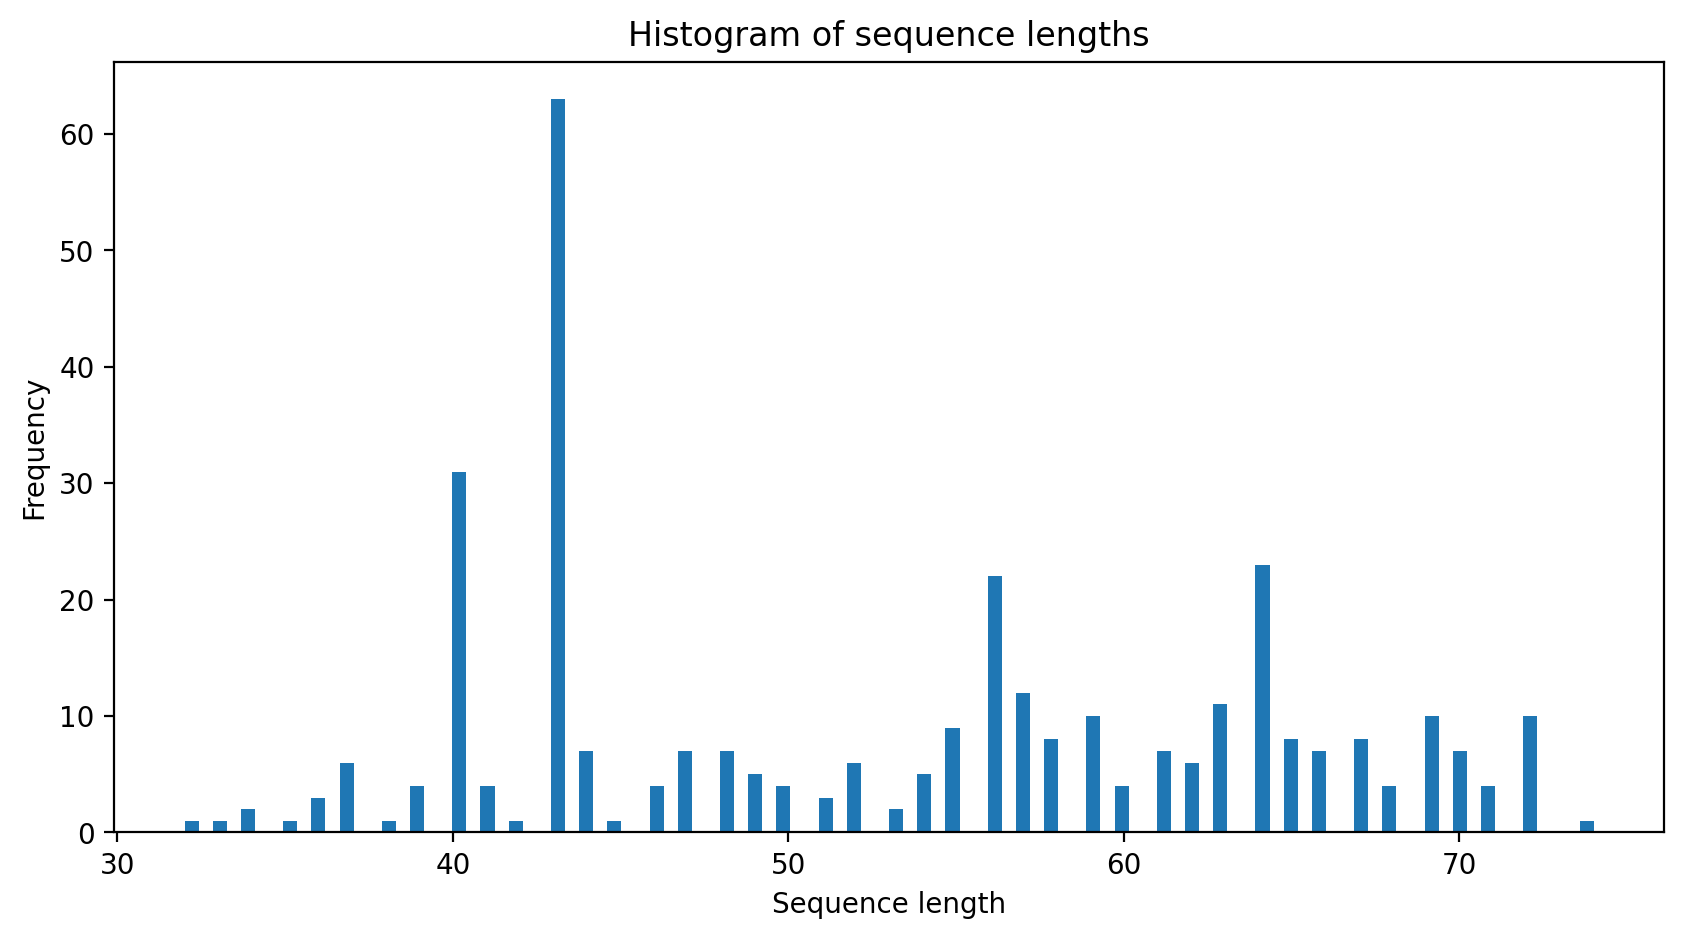

In [21]:
# seq_len histogram
plt.figure(figsize=(10,5))
plt.hist(df_metric['seq_len'], bins=100)
plt.title('Histogram of sequence lengths')
plt.xlabel('Sequence length')
plt.ylabel('Frequency')
plt.show()

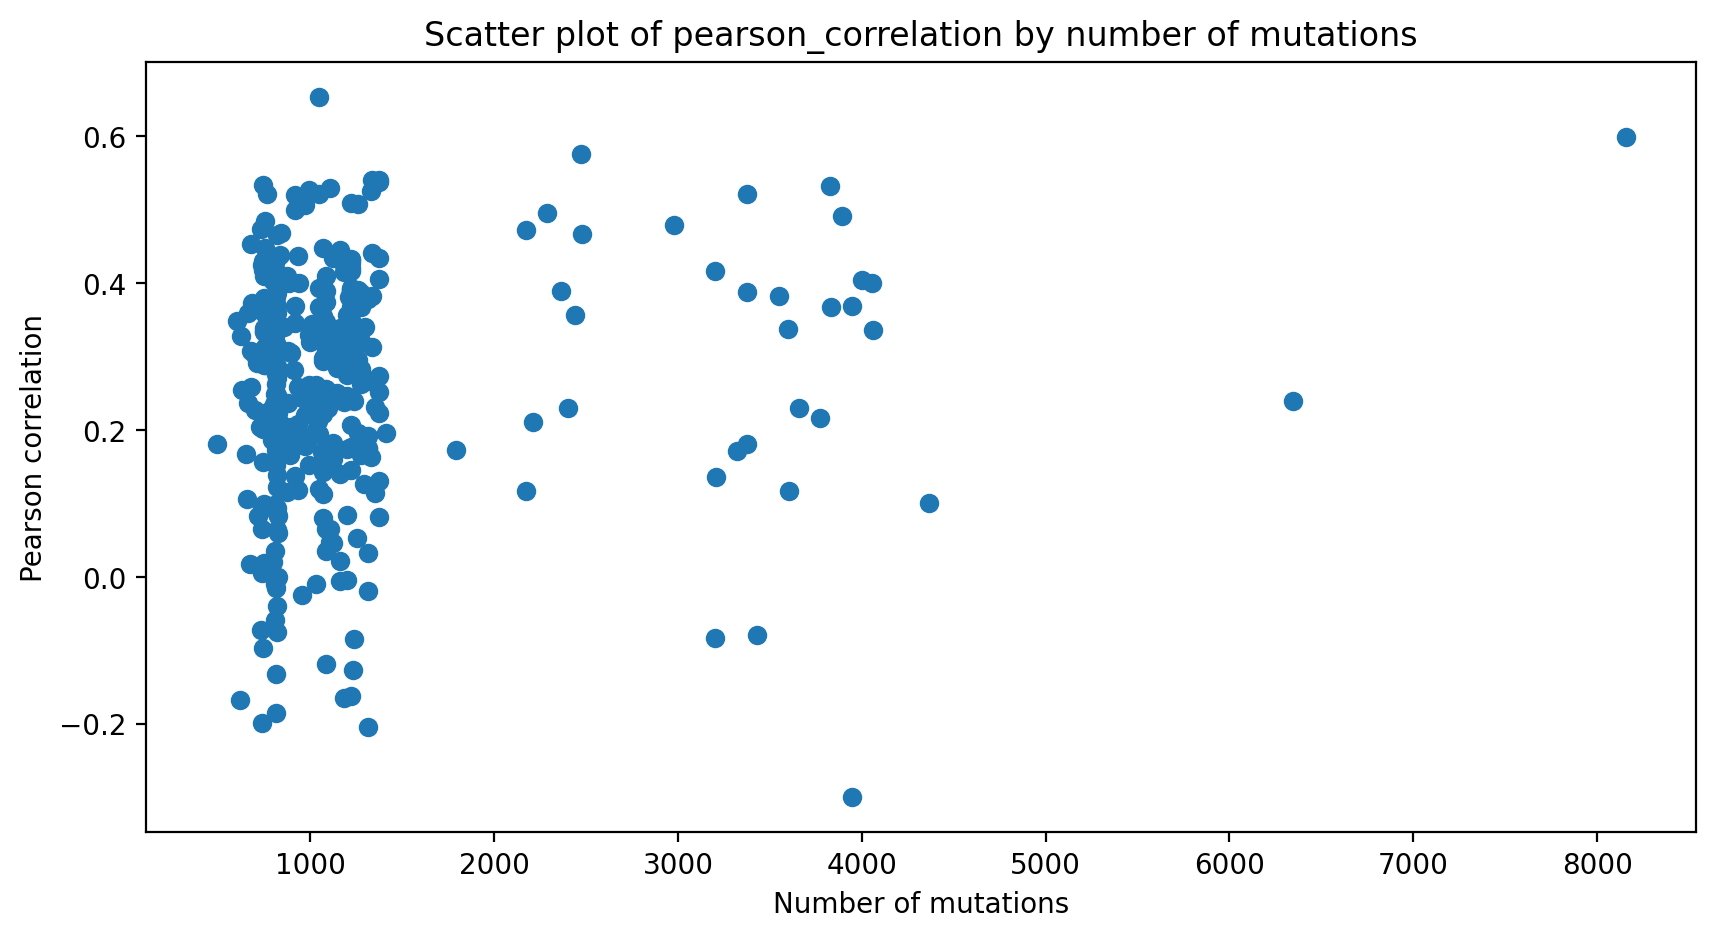

In [22]:
# Pearson coorelation vs num_mutations
plt.figure(figsize=(10,5))
plt.scatter(df_metric['num_mutations'], df_metric['pearson_correlation'])
plt.title('Scatter plot of pearson_correlation by number of mutations')
plt.xlabel('Number of mutations')
plt.ylabel('Pearson correlation')
plt.show()

<Figure size 1000x500 with 0 Axes>

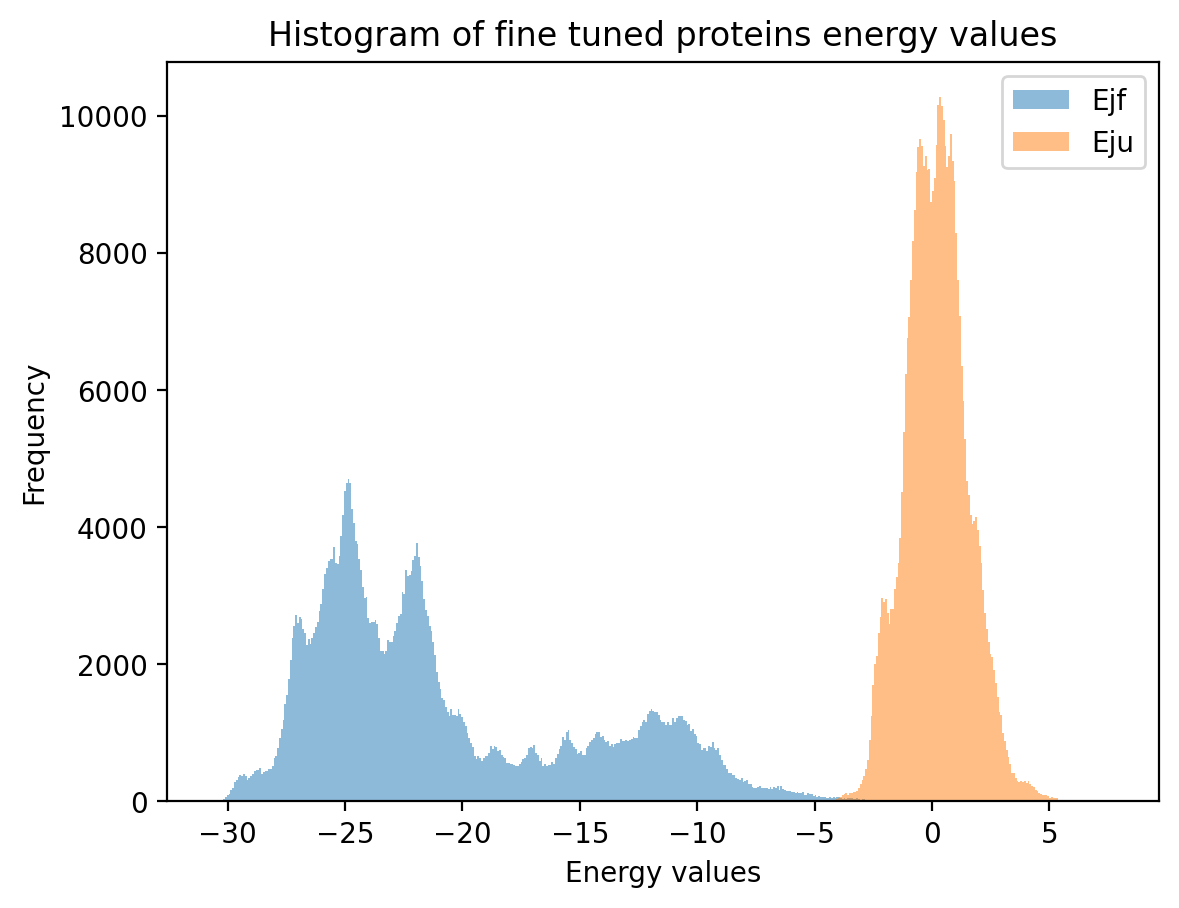

In [23]:
# plot energy Ejf values
plt.figure(figsize=(10,5))
df_fine_tune[['Ejf','Eju']].plot.hist(bins=500, alpha=0.5)
plt.title('Histogram of fine tuned proteins energy values')
plt.xlabel('Energy values')
plt.ylabel('Frequency')
plt.show()

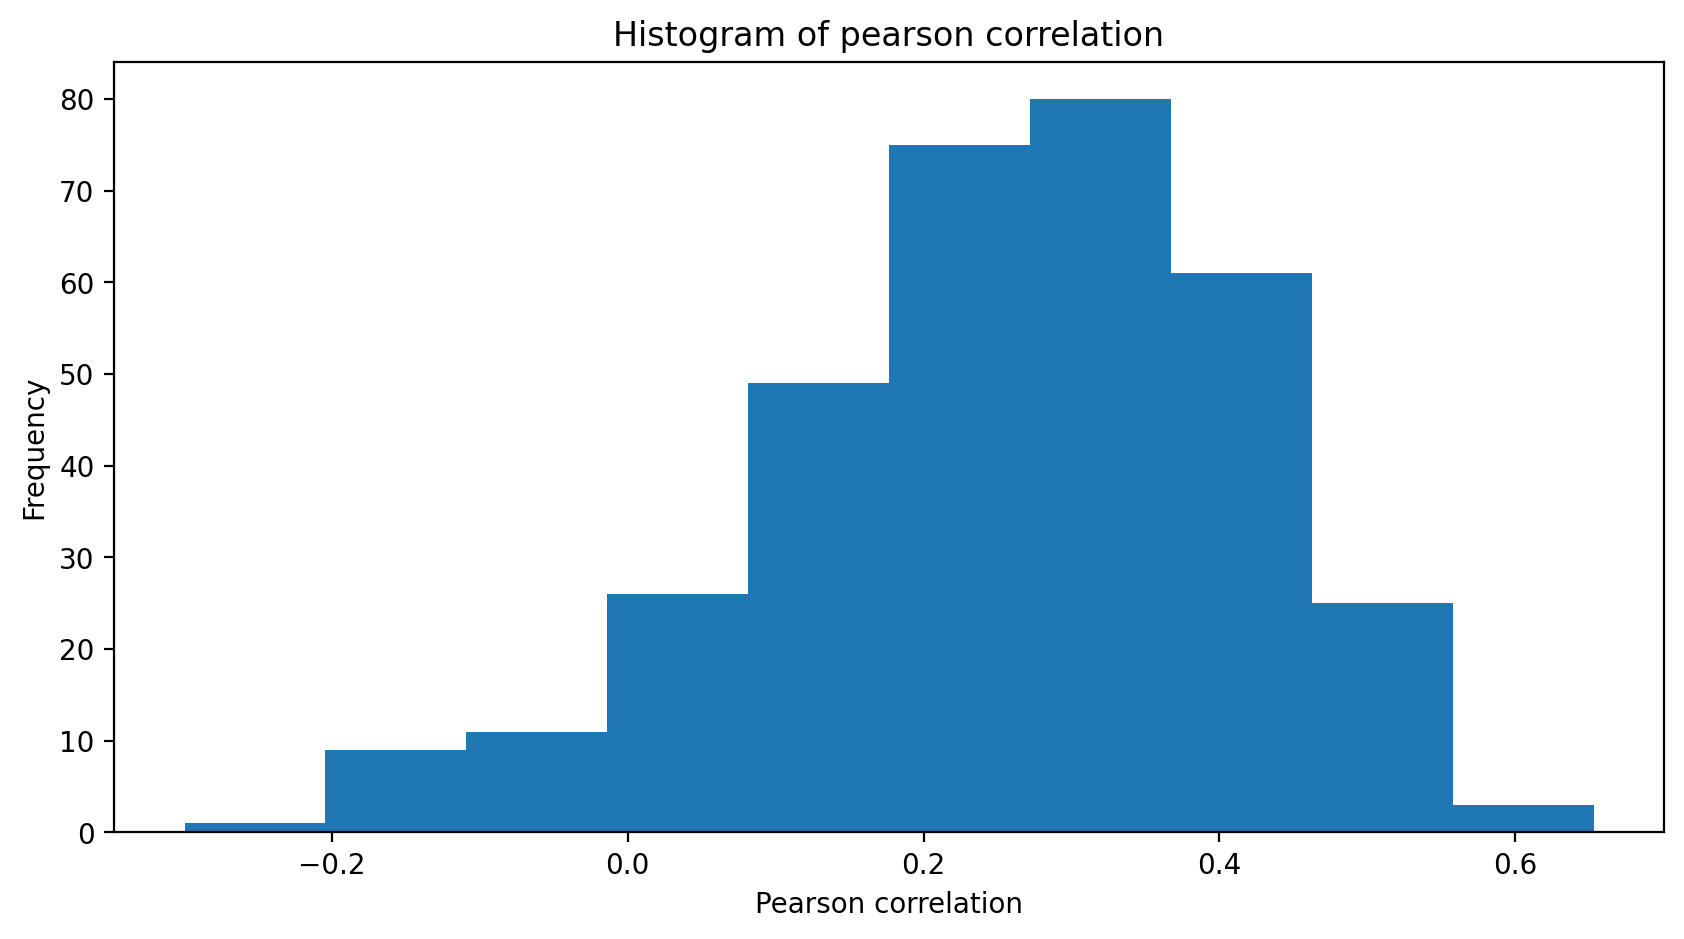

In [24]:
# histogram of pearson correlation
plt.figure(figsize=(10,5))
plt.hist(df_metric['pearson_correlation'], bins=10)
plt.title('Histogram of pearson correlation')
plt.xlabel('Pearson correlation')
plt.ylabel('Frequency')
plt.show()

# Fine Tuned model results
In this section we will observe fine tuned version results

We will look at the results in the same manner:
1. Histogram of the energys 
2. Energys vs sequence len
3. $\Delta G$ coorelation

In [25]:
df_fine_tune = pd.read_csv('../Megascale-fineTuning/evaluation/PEM_fine_tuned-trianed_models-2cycle_dropkf_eval.csv')
df_metric = pd.read_csv('../Megascale-fineTuning/evaluation/PEM_fine_tuned-trianed_models-2cycle_dropkf_protein_metrics.csv')
display(df_fine_tune)
display(df_metric)

,Ejf,Eju,name,mutations,delta_g,delta_g_pred,seq_len
0,-2.473366,1.019386,1A0N,wt,2.560197,3.492752,58
1,-2.473366,1.019385,1A0N,wt,2.582720,3.492751,58
2,-2.473366,1.019386,1A0N,wt,2.567326,3.492752,58
3,-2.473366,1.019386,1A0N,wt,2.552018,3.492752,58
4,-2.473366,1.019386,1A0N,wt,2.595072,3.492752,58
...,...,...,...,...,...,...,...
421635,-2.964219,-0.501039,v2_6IVS,V48K,3.795679,2.463180,48
421636,-2.980448,-0.411187,v2_6IVS,V48R,3.492887,2.569261,48
421637,-3.099758,-0.724102,v2_6IVS,V48F,3.612490,2.375656,48
421638,-2.909094,-0.406421,v2_6IVS,V48W,3.544382,2.502672,48


,protein_name,num_mutations,seq_len,pearson_correlation,mae,rmse,avg_loss
0,1A0N,2210,58,0.829583,1.000779,1.144225,0.014196
1,1A0N,2210,58,0.829583,1.000779,1.144225,0.014196
2,1A0N,2210,58,0.829583,1.000779,1.144225,0.014196
3,1A0N,2210,58,0.829583,1.000779,1.144225,0.014196
4,1A0N,2210,58,0.829583,1.000779,1.144225,0.014196
...,...,...,...,...,...,...,...
421635,v2_6IVS,916,48,0.696467,1.651682,1.767756,0.054888
421636,v2_6IVS,916,48,0.696467,1.651682,1.767756,0.054888
421637,v2_6IVS,916,48,0.696467,1.651682,1.767756,0.054888
421638,v2_6IVS,916,48,0.696467,1.651682,1.767756,0.054888


In [26]:
# distince df_metric lines
df_metric = df_metric.drop_duplicates(subset=['protein_name'])
df_metric

,protein_name,num_mutations,seq_len,pearson_correlation,mae,rmse,avg_loss
0,1A0N,2210,58,0.829583,1.000779,1.144225,0.014196
2210,1A32,1202,63,0.837450,1.503274,1.596332,0.038496
3412,1AOY,1316,69,0.811065,0.514726,0.700052,0.012655
4728,1B7J,1221,64,0.795774,1.172875,2.338643,0.030375
5949,1BK2,3206,56,0.905129,1.207484,1.497202,0.012134
...,...,...,...,...,...,...,...
416666,2MSJ,1221,64,0.781206,1.273687,2.347110,0.032758
417887,3CQT,1088,57,0.857286,0.591558,0.786292,0.017205
418975,HHH_rd2_0181,816,43,0.850655,0.434732,0.582509,0.016390
419791,r11_951_TrROS_Hall,933,49,0.824001,0.536101,0.614118,0.019527


In [27]:
# Add l1 loss to the dataframe
df_fine_tune['l1_loss'] = np.abs(df_fine_tune['delta_g_pred'] - df_fine_tune['delta_g'])
df_fine_tune

,Ejf,Eju,name,mutations,delta_g,delta_g_pred,seq_len,l1_loss
0,-2.473366,1.019386,1A0N,wt,2.560197,3.492752,58,0.932555
1,-2.473366,1.019385,1A0N,wt,2.582720,3.492751,58,0.910031
2,-2.473366,1.019386,1A0N,wt,2.567326,3.492752,58,0.925426
3,-2.473366,1.019386,1A0N,wt,2.552018,3.492752,58,0.940733
4,-2.473366,1.019386,1A0N,wt,2.595072,3.492752,58,0.897680
...,...,...,...,...,...,...,...,...
421635,-2.964219,-0.501039,v2_6IVS,V48K,3.795679,2.463180,48,1.332499
421636,-2.980448,-0.411187,v2_6IVS,V48R,3.492887,2.569261,48,0.923626
421637,-3.099758,-0.724102,v2_6IVS,V48F,3.612490,2.375656,48,1.236835
421638,-2.909094,-0.406421,v2_6IVS,V48W,3.544382,2.502672,48,1.041710


In [28]:
# Add loss to metric per protein 
df_metric['l1_loss'] = df_metric['protein_name'].apply(lambda x: df_fine_tune[df_fine_tune['name']==x]['l1_loss'].values.mean())
df_metric

,protein_name,num_mutations,seq_len,pearson_correlation,mae,rmse,avg_loss,l1_loss
0,1A0N,2210,58,0.829583,1.000779,1.144225,0.014196,1.000779
2210,1A32,1202,63,0.837450,1.503274,1.596332,0.038496,1.503274
3412,1AOY,1316,69,0.811065,0.514726,0.700052,0.012655,0.514726
4728,1B7J,1221,64,0.795774,1.172875,2.338643,0.030375,1.172875
5949,1BK2,3206,56,0.905129,1.207484,1.497202,0.012134,1.207484
...,...,...,...,...,...,...,...,...
416666,2MSJ,1221,64,0.781206,1.273687,2.347110,0.032758,1.273687
417887,3CQT,1088,57,0.857286,0.591558,0.786292,0.017205,0.591558
418975,HHH_rd2_0181,816,43,0.850655,0.434732,0.582509,0.016390,0.434732
419791,r11_951_TrROS_Hall,933,49,0.824001,0.536101,0.614118,0.019527,0.536101


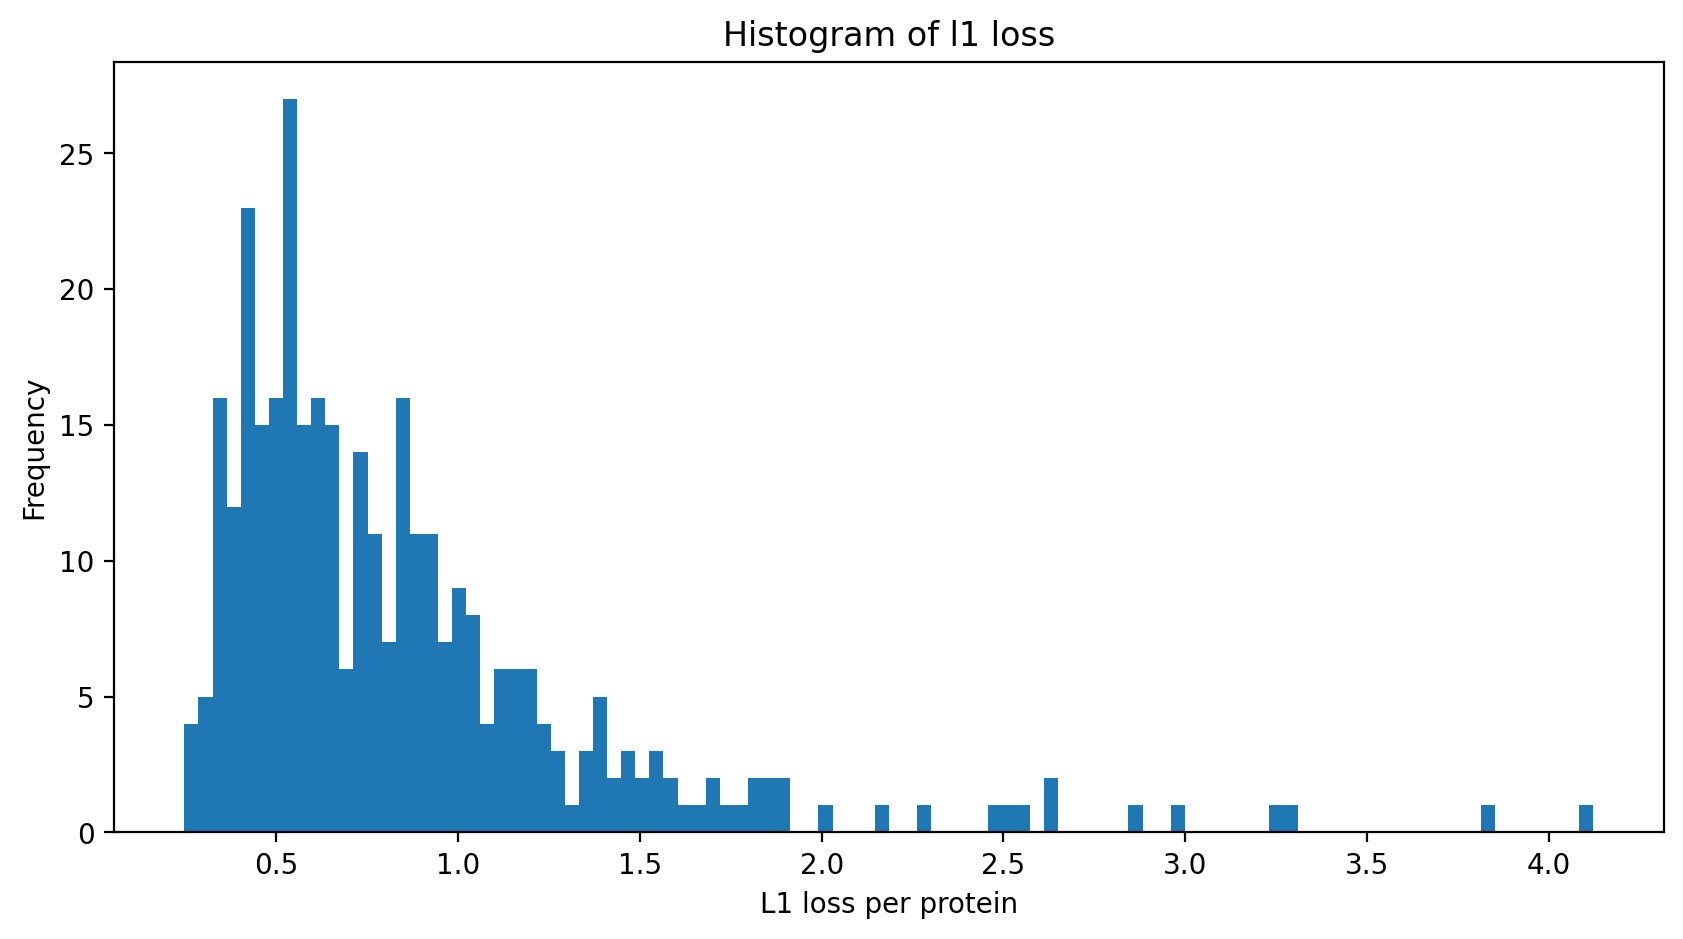

In [29]:
# l1 loss histogram
plt.figure(figsize=(10,5))
plt.hist(df_metric['l1_loss'], bins=100)
plt.title('Histogram of l1 loss')
plt.xlabel('L1 loss per protein')
plt.ylabel('Frequency')
plt.show()

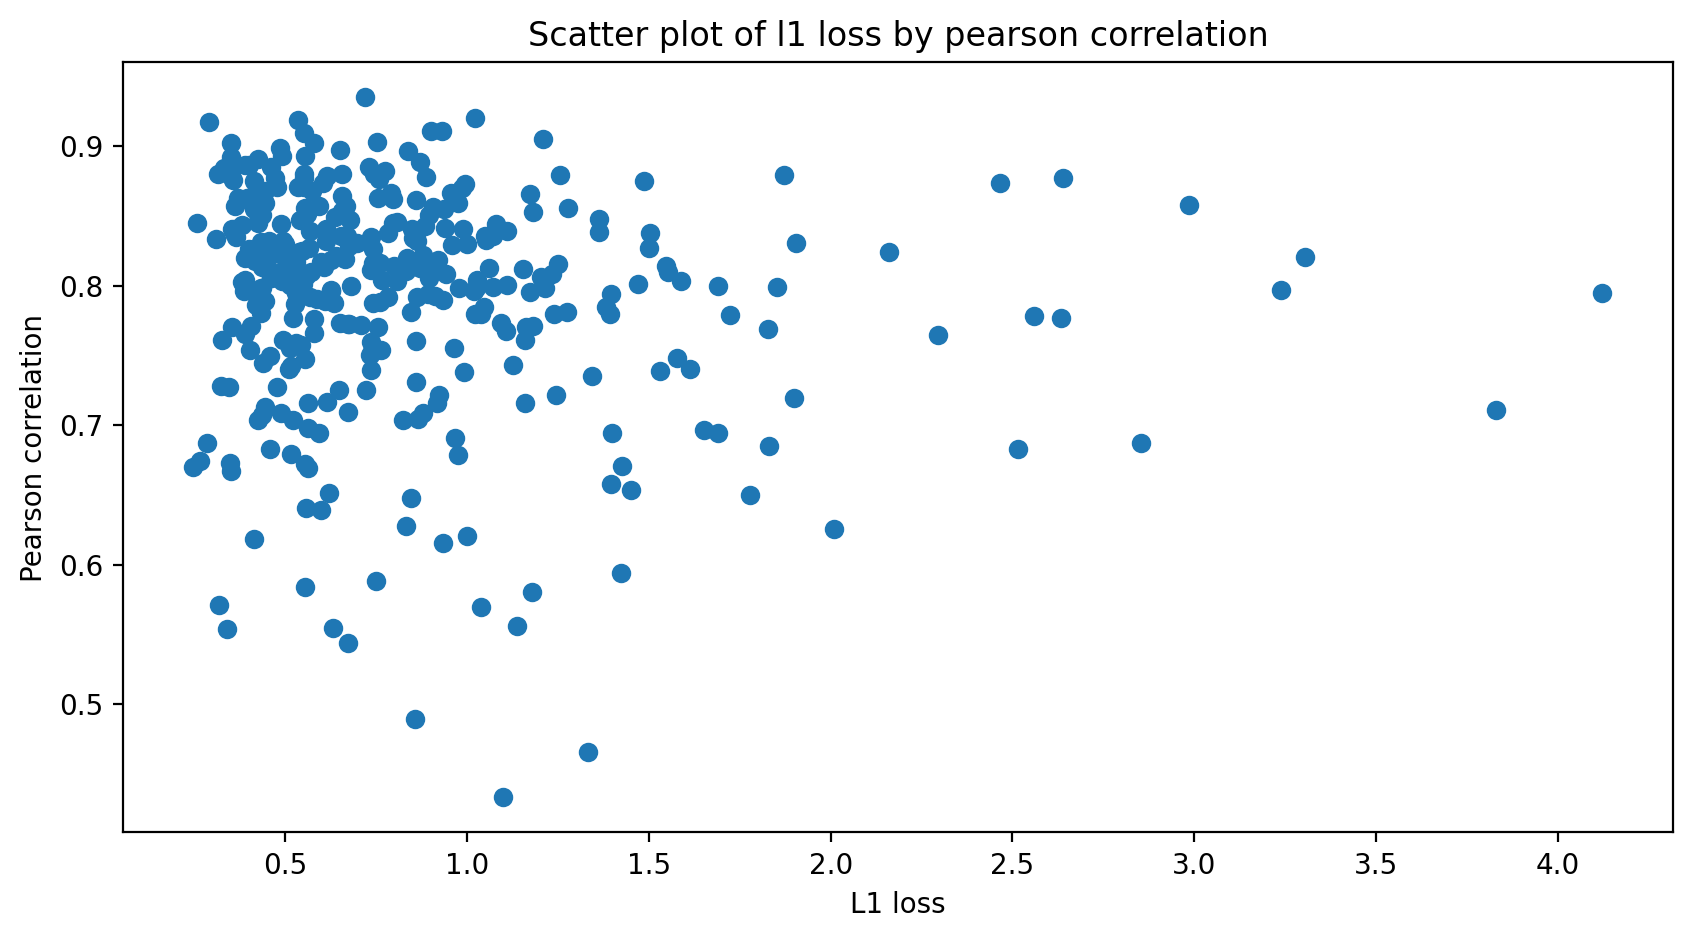

In [30]:
# l1 loss vs pearson correlation
plt.figure(figsize=(10,5))
plt.scatter(df_metric['l1_loss'], df_metric['pearson_correlation'])
plt.title('Scatter plot of l1 loss by pearson correlation')
plt.xlabel('L1 loss')
plt.ylabel('Pearson correlation')
plt.show()

<Figure size 1000x500 with 0 Axes>

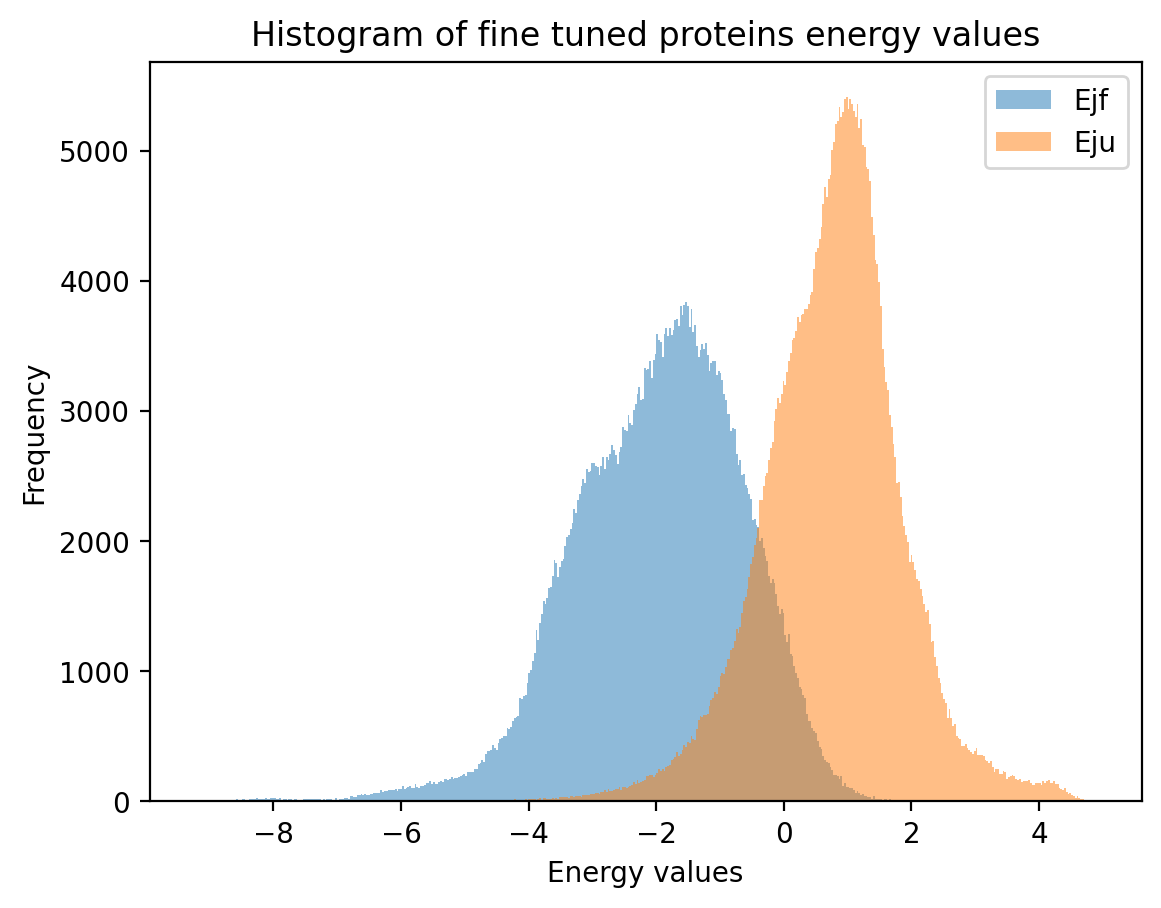

In [31]:
# protein enery values
plt.figure(figsize=(10,5))
df_fine_tune[['Ejf','Eju']].plot.hist(bins=500, alpha=0.5)
plt.title('Histogram of fine tuned proteins energy values')
plt.xlabel('Energy values')
plt.ylabel('Frequency')
plt.show()

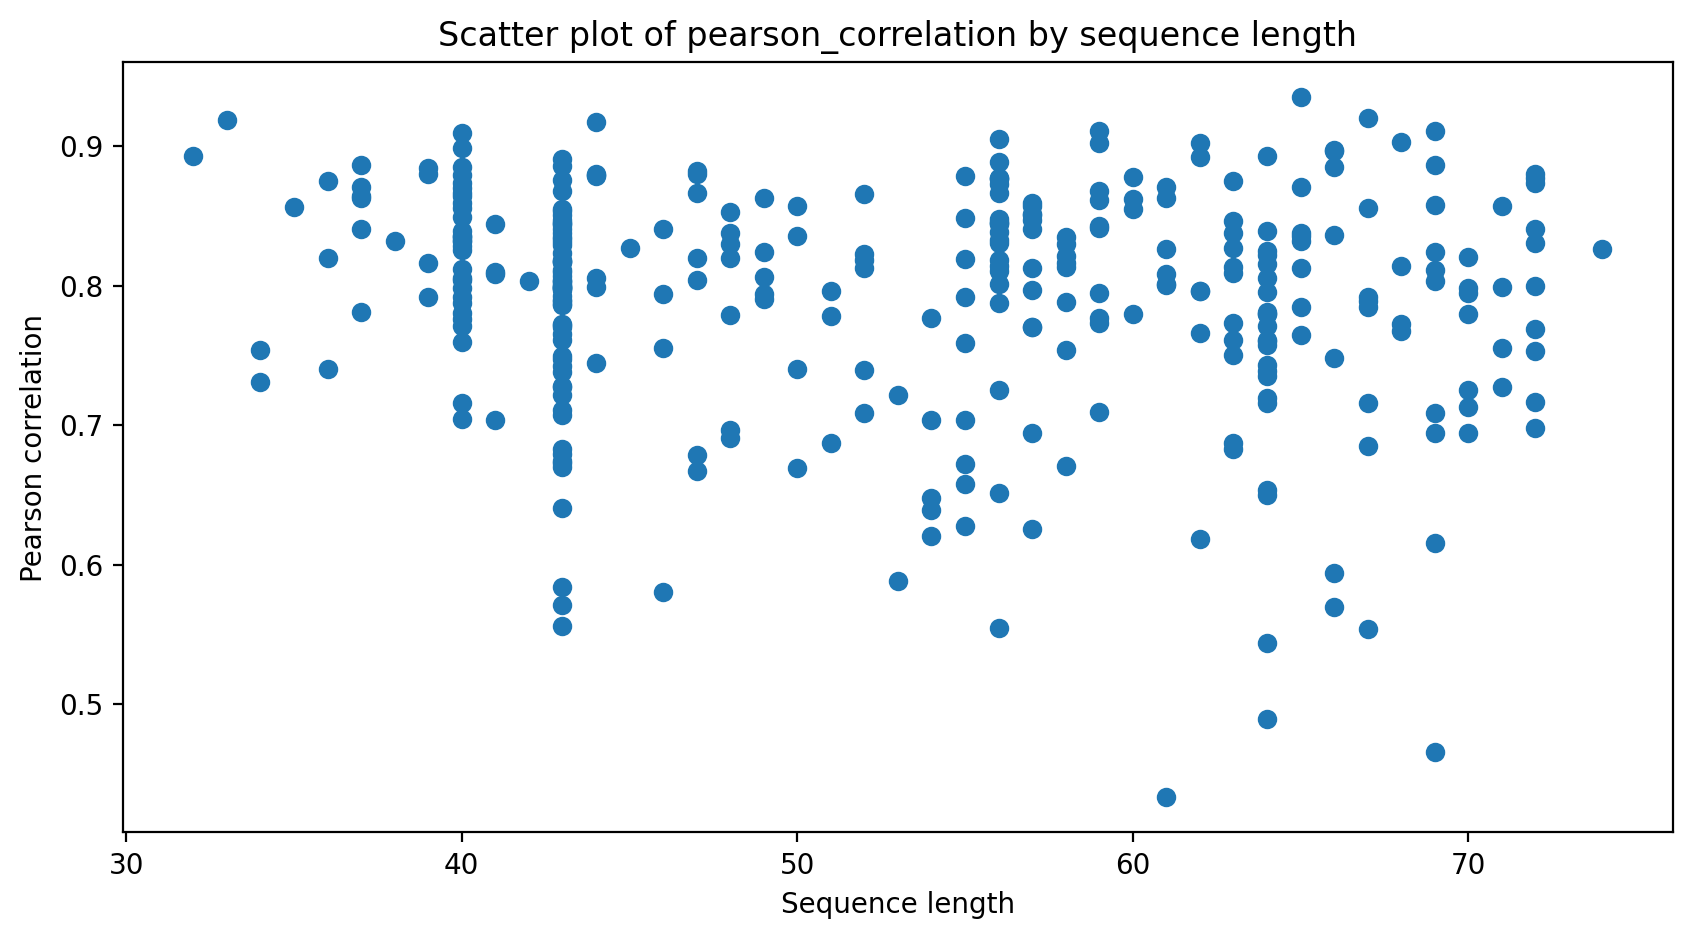

In [32]:
# seq_len vs pearson correlation
plt.figure(figsize=(10,5))
plt.scatter(df_metric['seq_len'], df_metric['pearson_correlation'])
plt.title('Scatter plot of pearson_correlation by sequence length')
plt.xlabel('Sequence length')
plt.ylabel('Pearson correlation')
plt.show()

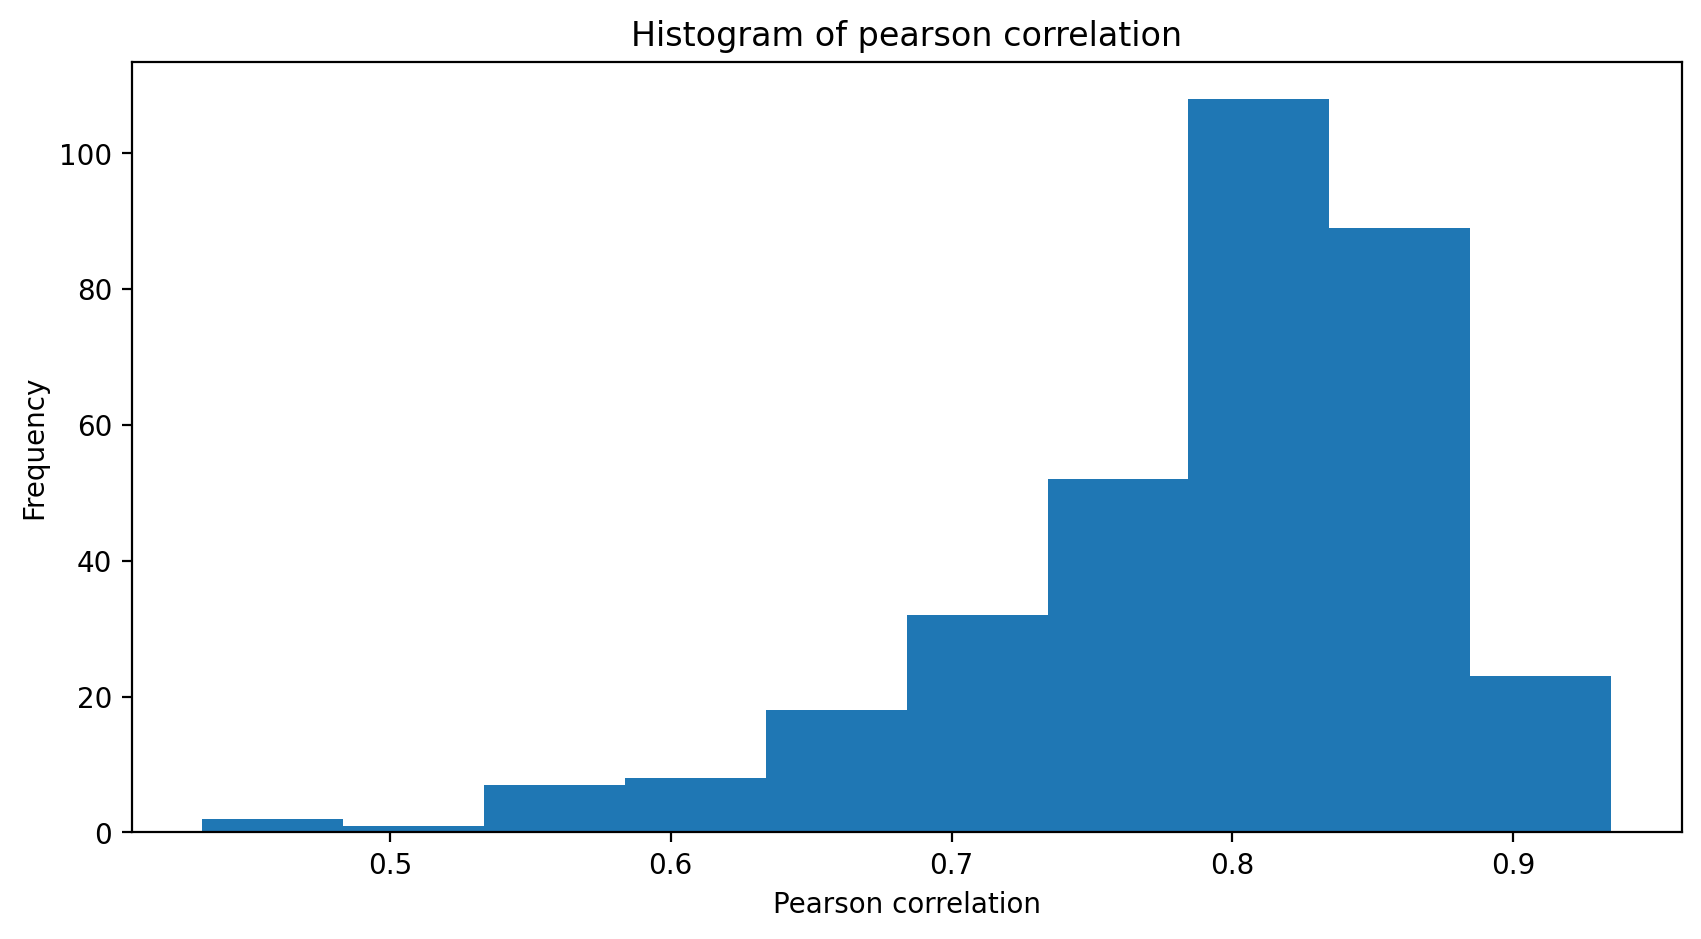

In [33]:
# pearson correlation histogram
plt.figure(figsize=(10,5))
plt.hist(df_metric['pearson_correlation'], bins=10)
plt.title('Histogram of pearson correlation')
plt.xlabel('Pearson correlation')
plt.ylabel('Frequency')
plt.show()

In [34]:
# mean of pearson correlation
mean_pearson = df_metric['pearson_correlation'].mean()
mean_pearson

0.7909936546748245

In [35]:
# Explore cases with less then 0.6 pearson correlation
df_metric[df_metric['pearson_correlation']<0.6][['protein_name','pearson_correlation','seq_len','num_mutations']]

,protein_name,pearson_correlation,seq_len,num_mutations
122515,2I5L,0.569984,66,1259
123774,2JN4,0.594174,66,1258
128248,2JVG,0.554569,56,1069
170469,2LHC,0.580121,46,879
209916,2MC5,0.465633,69,1316
211232,2MCH,0.489631,64,1182
212414,2MCK,0.433124,61,1042
223122,2MXD,0.588427,53,1001
298363,6M3N,0.543651,64,1221
331399,EEHEE_rd4_0005,0.583858,43,819


In [36]:
p_2MC5 = df_fine_tune[df_fine_tune['name'] == '2MC5']
p_2MC5

,Ejf,Eju,name,mutations,delta_g,delta_g_pred,seq_len,l1_loss
209916,-0.627731,-0.740291,2MC5,wt,1.703911,-0.112560,69,1.816471
209917,-0.627731,-0.740291,2MC5,wt,1.371869,-0.112561,69,1.484430
209918,-0.627731,-0.740291,2MC5,wt,1.379854,-0.112560,69,1.492414
209919,-0.627731,-0.740291,2MC5,wt,1.378551,-0.112560,69,1.491111
209920,-0.627731,-0.740292,2MC5,wt,1.436619,-0.112561,69,1.549180
...,...,...,...,...,...,...,...,...
211227,-0.805311,-0.201596,2MC5,S53C,2.213952,0.603715,69,1.610237
211228,-0.712988,-1.334212,2MC5,L65C,1.979829,-0.621223,69,2.601053
211229,-0.891526,-0.376366,2MC5,K67C,2.149393,0.515160,69,1.634233
211230,-0.458708,-0.608491,2MC5,V68C,2.032583,-0.149783,69,2.182366


In [37]:
p_2MC5['l1_loss'].mean()

1.331007001901064

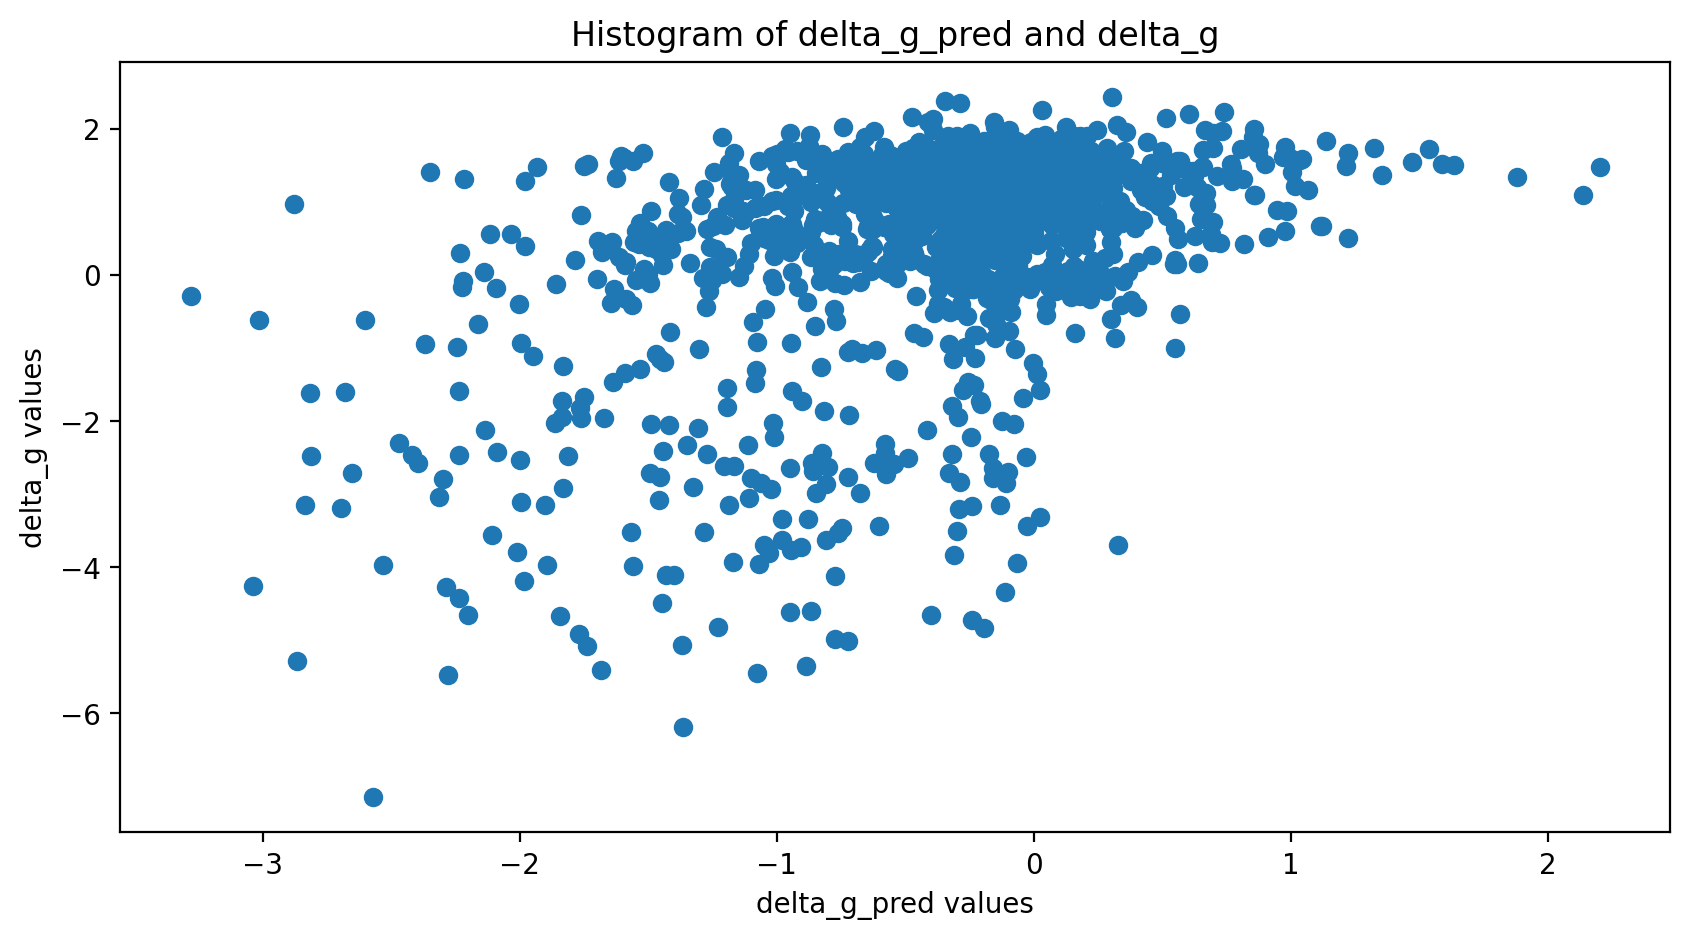

In [38]:
# plot hist of delta_g_pred and delta_g
plt.figure(figsize=(10,5))
plt.scatter(p_2MC5['delta_g_pred'], p_2MC5['delta_g'])
plt.title('Histogram of delta_g_pred and delta_g')
plt.xlabel('delta_g_pred values')
plt.ylabel('delta_g values')
plt.show()

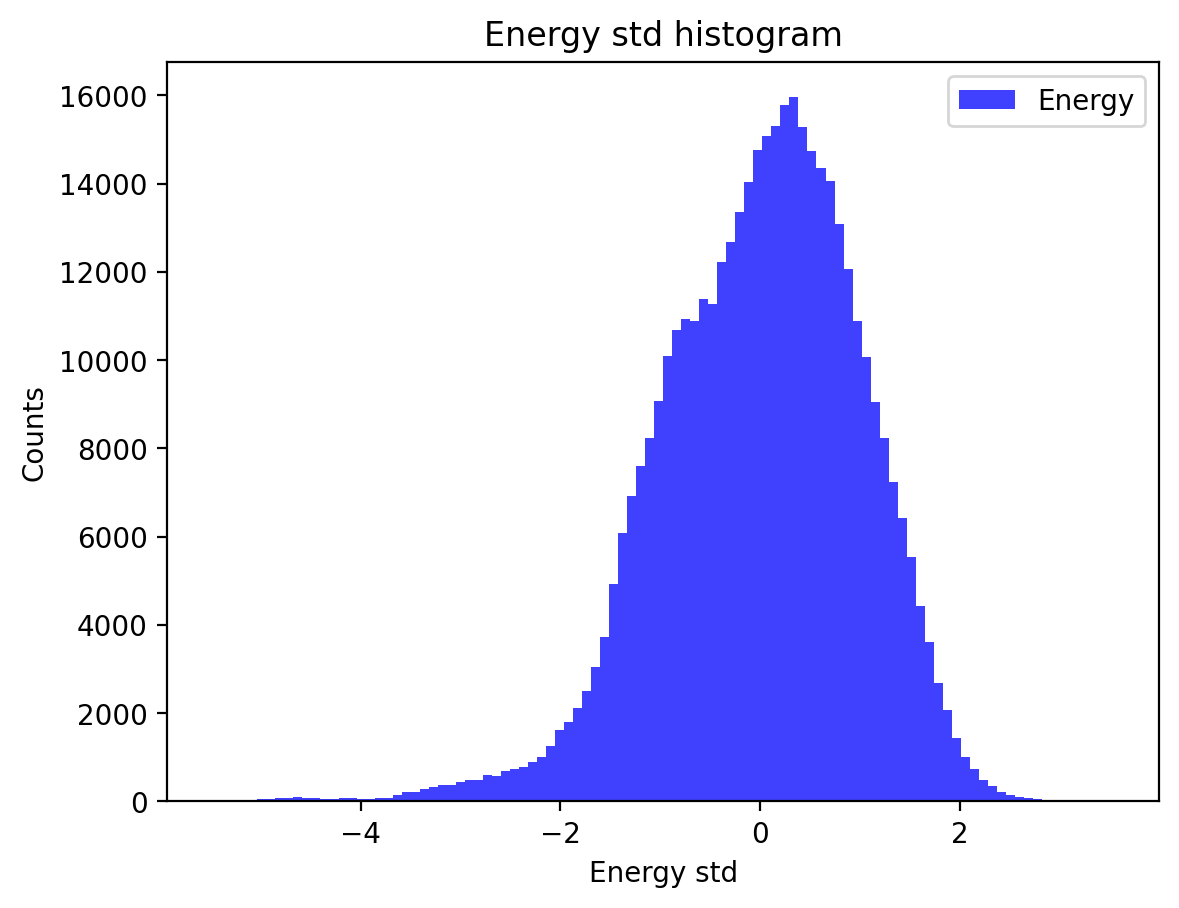

In [39]:
# show hist by std
std = df_fine_tune['Ejf'].std()
mean = df_fine_tune['Ejf'].mean()
normelize_energy = (df_fine_tune['Ejf'] - mean) / std
plt.hist(normelize_energy, bins=100, alpha=0.75, color='b', label='Energy')
plt.xlabel('Energy std')   
plt.ylabel('Counts')
plt.title('Energy std histogram')
plt.legend()
plt.show()

# Look at AlphaFold predictions and there median

In [40]:
pdb_path = '../data/Processed_K50_dG_datasets/AlphaFold_model_PDBs/1A0N.pdb'
pdb = open(pdb_path, 'r')
pdb_lines = pdb.readlines()
pdb.close()
pdb_lines

['ATOM      1  N   VAL A   1       3.830   6.584  12.265  1.00 67.14           N  \n',
 'ATOM      2  H   VAL A   1       3.390   7.285  12.844  1.00 67.14           H  \n',
 'ATOM      3  H2  VAL A   1       4.571   7.029  11.744  1.00 67.14           H  \n',
 'ATOM      4  H3  VAL A   1       4.212   5.849  12.844  1.00 67.14           H  \n',
 'ATOM      5  CA  VAL A   1       2.818   6.038  11.334  1.00 67.14           C  \n',
 'ATOM      6  HA  VAL A   1       3.288   5.350  10.631  1.00 67.14           H  \n',
 'ATOM      7  C   VAL A   1       2.256   7.212  10.563  1.00 67.14           C  \n',
 'ATOM      8  CB  VAL A   1       1.695   5.288  12.077  1.00 67.14           C  \n',
 'ATOM      9  HB  VAL A   1       1.178   5.968  12.754  1.00 67.14           H  \n',
 'ATOM     10  O   VAL A   1       1.746   8.121  11.205  1.00 67.14           O  \n',
 'ATOM     11  CG1 VAL A   1       0.690   4.709  11.083  1.00 67.14           C  \n',
 'ATOM     12 HG11 VAL A   1      -0.057   

In [98]:
# Parse the pdb file extract the model confidence (11 colunm) and the residue number (2 column)

def get_confidence_median(protein_name):
    pdb_path = f'../data/Processed_K50_dG_datasets/AlphaFold_model_PDBs/{protein_name}.pdb'
    pdb = open(pdb_path, 'r')
    pdb_lines = pdb.readlines()
    pdb.close()
    model_confidence = []
    for line in pdb_lines:
        if line.startswith('ATOM'):
            # remove spaces
            split_line = ' '.join(line.split()).split(' ')
            model_confidence.append(float(split_line[10]))
    return np.median(model_confidence)
    
model_confidence = []
residue_number = []
for line in pdb_lines:
    if line.startswith('ATOM'):
        # remove spaces
        split_line = ' '.join(line.split()).split(' ')
        model_confidence.append(float(split_line[10]))
        residue_number.append(float(split_line[1]))
# Create a dataframe
pdb_df = pd.DataFrame({'residue_number': residue_number, 'model_confidence': model_confidence})
pdb_df

,residue_number,model_confidence
0,1.0,67.14
1,2.0,67.14
2,3.0,67.14
3,4.0,67.14
4,5.0,67.14
...,...,...
900,901.0,92.71
901,902.0,92.71
902,903.0,92.71
903,904.0,92.71


In [99]:
# Get median of model confidence
median_confidence = pdb_df['model_confidence'].sort_values().min()
median_confidence

67.14

In [100]:
# Add to each row in df_metric the median confidence
get_confidence_median('2MC5')

56.46

In [101]:
from tqdm import tqdm
tqdm.pandas()

df_metric['model_confidence'] = df_metric['protein_name'].progress_apply(lambda x: get_confidence_median(x))
df_metric

100%|██████████| 340/340 [00:00<00:00, 386.21it/s]


,protein_name,num_mutations,seq_len,pearson_correlation,mae,rmse,avg_loss,l1_loss,model_confidence
0,1A0N,2210,58,0.829583,1.000779,1.144225,0.014196,1.000779,98.19
2210,1A32,1202,63,0.837450,1.503274,1.596332,0.038496,1.503274,98.17
3412,1AOY,1316,69,0.811065,0.514726,0.700052,0.012655,0.514726,96.13
4728,1B7J,1221,64,0.795774,1.172875,2.338643,0.030375,1.172875,98.64
5949,1BK2,3206,56,0.905129,1.207484,1.497202,0.012134,1.207484,98.18
...,...,...,...,...,...,...,...,...,...
416666,2MSJ,1221,64,0.781206,1.273687,2.347110,0.032758,1.273687,98.67
417887,3CQT,1088,57,0.857286,0.591558,0.786292,0.017205,0.591558,98.06
418975,HHH_rd2_0181,816,43,0.850655,0.434732,0.582509,0.016390,0.434732,0.00
419791,r11_951_TrROS_Hall,933,49,0.824001,0.536101,0.614118,0.019527,0.536101,89.78


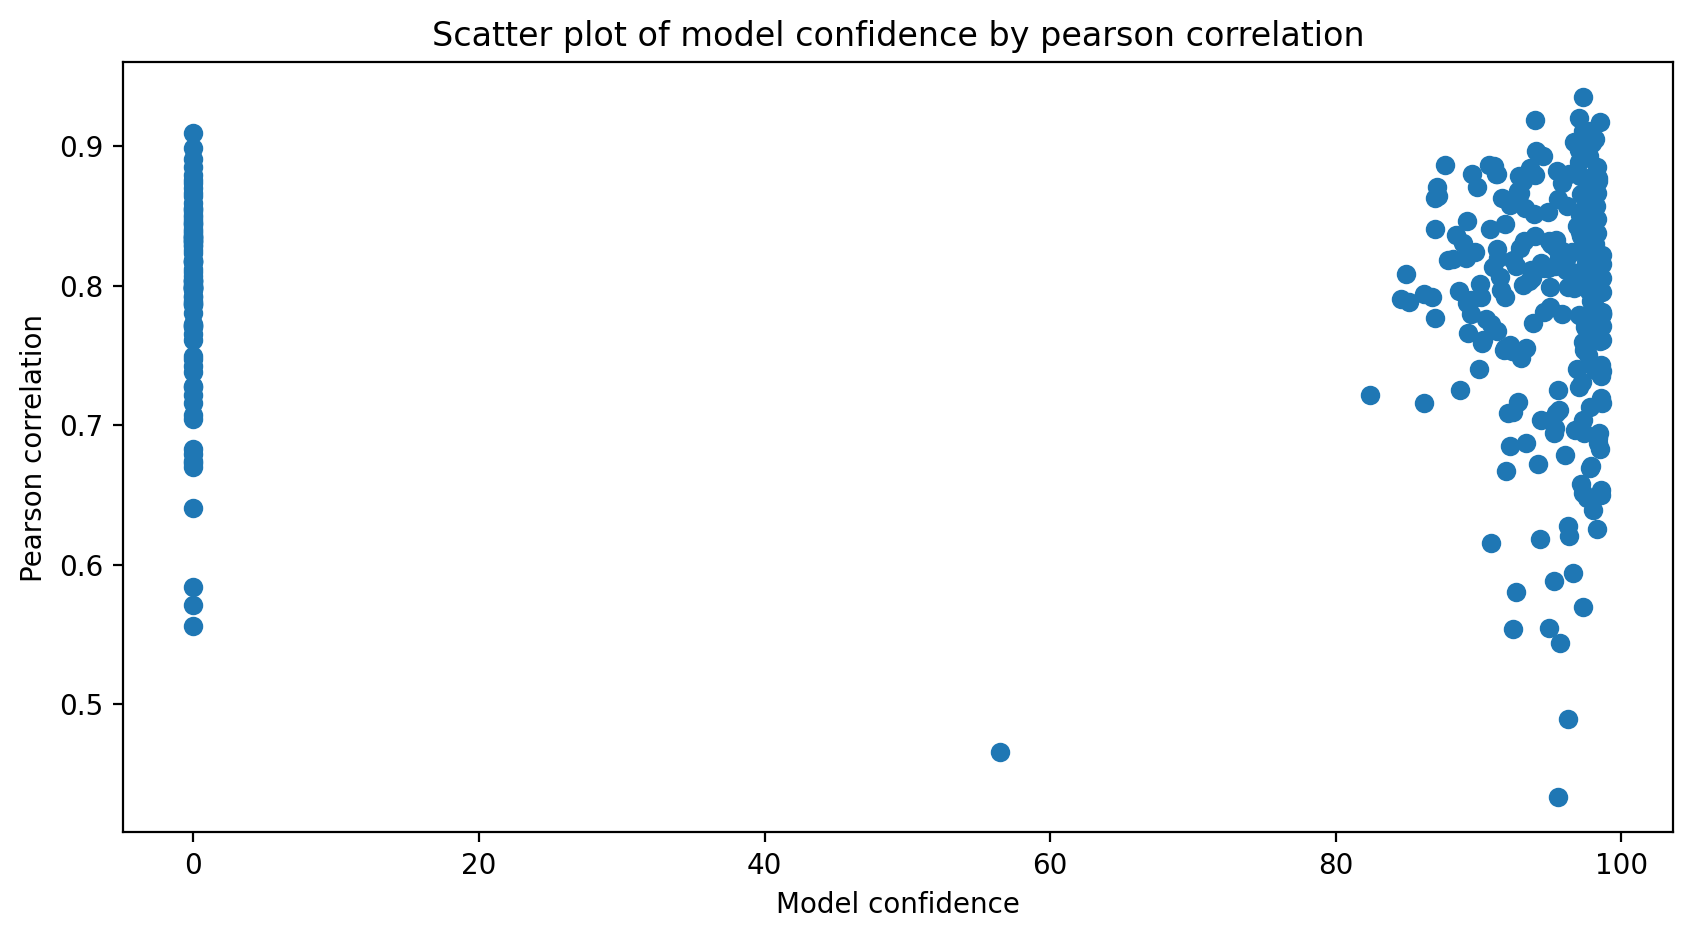

In [102]:
# plot correlation vs model confidence
plt.figure(figsize=(10,5))
plt.scatter(df_metric['model_confidence'], df_metric['pearson_correlation'])
plt.title('Scatter plot of model confidence by pearson correlation')
plt.xlabel('Model confidence')
plt.ylabel('Pearson correlation')
plt.show()

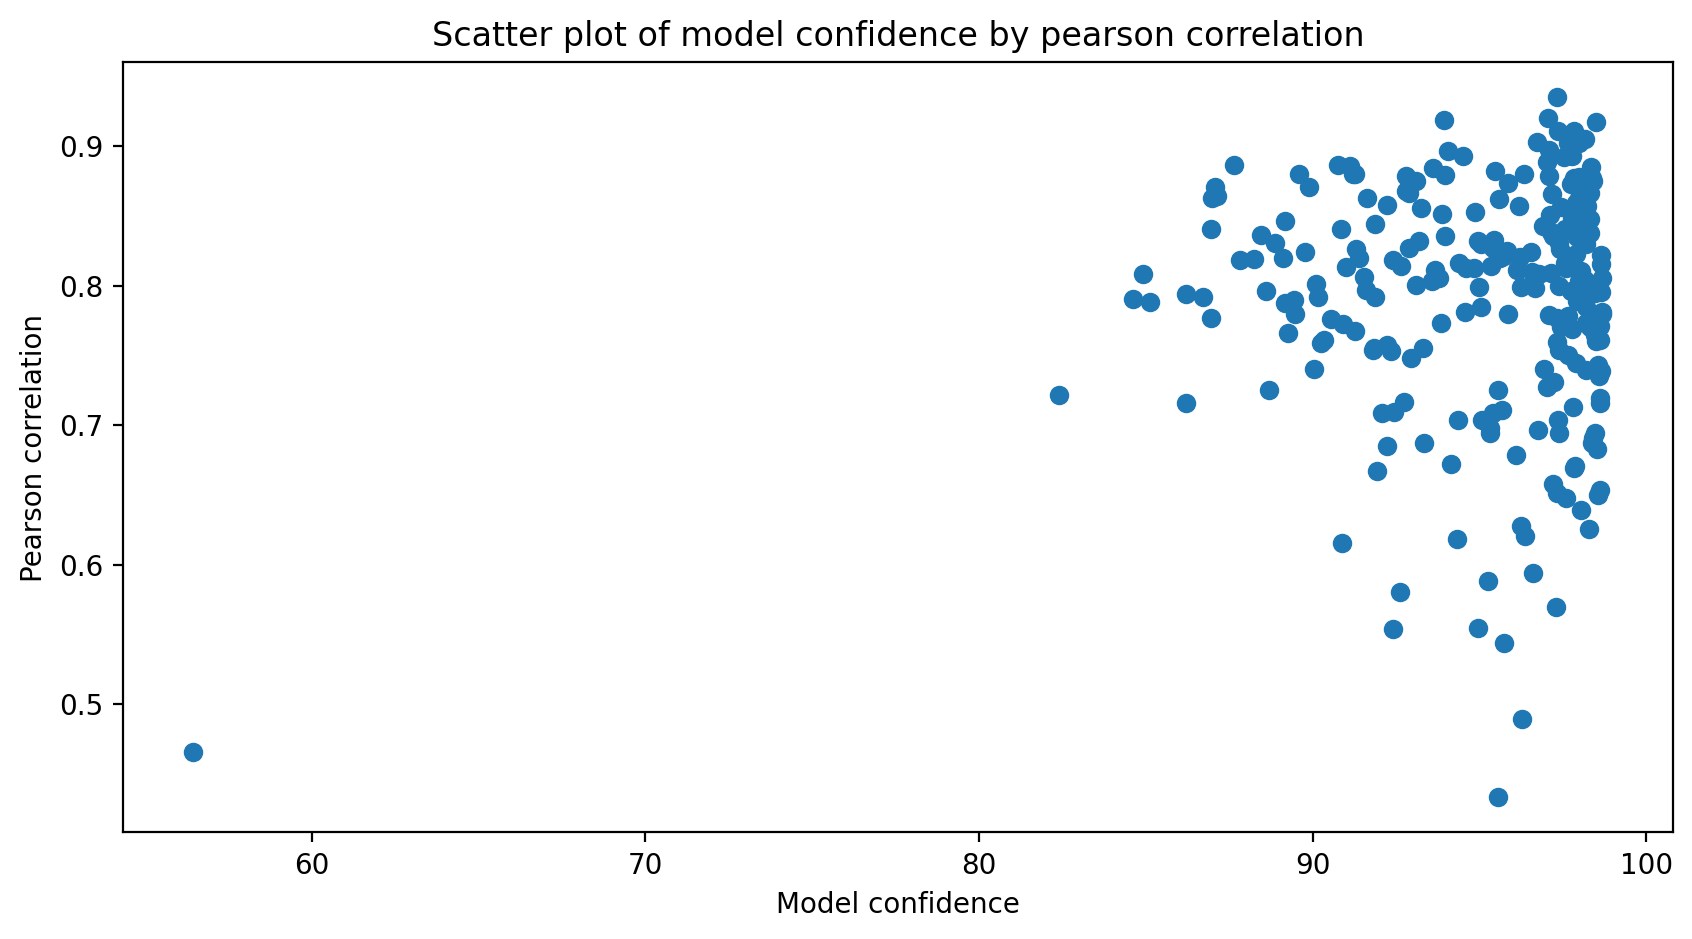

In [107]:
# plot withou the zero values
plt.figure(figsize=(10,5))
plt.scatter(df_metric['model_confidence'][df_metric['model_confidence']>0], df_metric['pearson_correlation'][df_metric['model_confidence']>0])
plt.title('Scatter plot of model confidence by pearson correlation')
plt.xlabel('Model confidence')
plt.ylabel('Pearson correlation')
plt.show()